<a href="https://colab.research.google.com/github/Coolicc/Big-Data-Analysis-PySpark/blob/main/Subreddit_links.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
!java -version

openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [ ]:
!update-alternatives --config java

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [ ]:
!pip install pyspark==2.4.6

     |████████████████████████████████| 218.4MB 61kB/s 
     |████████████████████████████████| 204kB 41.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=218814406 sha256=7f1798388d04b6f26e919baaa4a91781473dc382b1b8da9b9f2b5d9e312a2347
  Stored in directory: /root/.cache/pip/wheels/1e/5e/6a/17e906c94ec7246f260330a66e44a06a0809033ba2738a74a8
Successfully built pyspark


In [ ]:
!pip install graphframes

     |████████████████████████████████| 163kB 3.9MB/s 


In [ ]:
#obratite pažnju da total nije 0, to znači da se nije ništa skinulo
!curl -L -o "/usr/local/lib/python3.6/dist-packages/pyspark/jars/graphframes-0.8.0-spark2.4-s_2.11.jar" http://dl.bintray.com/spark-packages/maven/graphframes/graphframes/0.8.0-spark2.4-s_2.11/graphframes-0.8.0-spark2.4-s_2.11.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  371k  100  371k    0     0   486k      0 --:--:-- --:--:-- --:--:-- 3827k


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
import pyspark.sql.functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
subreddits = spark.read.json('/content/drive/My Drive/reddit_subreddits.ndjson')
subreddits.show(10)

+---------------+-------------------------+-----------------+-------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+--------------------+-----------+---------------------+---------------------+-------------------------+-----------------------+--------------+----------------+-----------+--------------------+------------+---------------------+------------------+--------------+---------------+--------------------+-----------+--------------------+--------+--------------------+----------+----+-----------------+---------------+--------------------------+---------+----+------------------+-------------------+-------+------------------+----------------------------+------+-------------+--------------------+--------------+----------+------------+----------+------------------+----------------+---------------+------------------+--------------------+-----------------+--------------+-----------

In [ ]:
title_links = spark.read.option("header","true").option("delimiter","\t").csv("/content/drive/My Drive/soc-redditHyperlinks-title.tsv")
title_links.show(10)

+-----------------+----------------+-------+-------------------+--------------+--------------------+
| SOURCE_SUBREDDIT|TARGET_SUBREDDIT|POST_ID|          TIMESTAMP|LINK_SENTIMENT|          PROPERTIES|
+-----------------+----------------+-------+-------------------+--------------+--------------------+
|       rddtgaming|        rddtrust|1u4pzzs|2013-12-31 16:39:18|             1|25.0,23.0,0.76,0....|
|          xboxone|   battlefield_4|1u4tmfs|2013-12-31 17:59:11|             1|100.0,88.0,0.78,0...|
|              ps4|   battlefield_4|1u4tmos|2013-12-31 17:59:40|             1|100.0,88.0,0.78,0...|
|fitnesscirclejerk|       leangains|1u50xfs|2013-12-31 19:01:56|             1|49.0,43.0,0.77551...|
|fitnesscirclejerk|     lifeprotips|1u51nps|2013-12-31 21:02:28|             1|14.0,14.0,0.78571...|
|           cancer|      fuckcancer|1u5216s|2013-12-31 18:59:26|             1|94.0,80.0,0.77659...|
|          jleague|          soccer|1u53hzs|2013-12-31 18:29:48|             1|85.0,75.0,0.

In [ ]:
body_links = spark.read.option("header","true").option("delimiter","\t").csv("/content/drive/My Drive/soc-redditHyperlinks-body.tsv")
body_links.show(10)

+----------------+----------------+-------+-------------------+--------------+--------------------+
|SOURCE_SUBREDDIT|TARGET_SUBREDDIT|POST_ID|          TIMESTAMP|LINK_SENTIMENT|          PROPERTIES|
+----------------+----------------+-------+-------------------+--------------+--------------------+
| leagueoflegends| teamredditteams|1u4nrps|2013-12-31 16:39:58|             1|345.0,298.0,0.756...|
|      theredlion|          soccer| 1u4qkd|2013-12-31 18:18:37|            -1|101.0,98.0,0.7425...|
|    inlandempire|          bikela|1u4qlzs|2014-01-01 14:54:35|             1|85.0,85.0,0.75294...|
|             nfl|             cfb|1u4sjvs|2013-12-31 17:37:55|             1|1124.0,949.0,0.77...|
|      playmygame|         gamedev|1u4w5ss|2014-01-01 02:51:13|             1|715.0,622.0,0.777...|
|      dogemarket|        dogecoin|1u4w7bs|2013-12-31 18:35:44|             1|1328.0,1110.0,0.7...|
|     locationbot|     legaladvice|1u4wfes|2014-01-07 20:17:41|             1|184.0,172.0,0.744...|


In [ ]:
print(title_links.count())
print(body_links.count())
links = title_links.union(body_links)
links.count()

571927
286561


858488

In [ ]:
subreddits.count()

763058

In [ ]:
subreddits.select([F.count(F.when(F.col(i).isNull(), i)).alias(i) for i in subreddits.columns]).show()

+---------------+-------------------------+-----------------+-------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+----------+-----------+---------------------+---------------------+-------------------------+-----------------------+--------------+----------------+-----------+-----------+------------+---------------------+------------------+--------------+---------------+----------+-----------+------------+--------+--------+---------+---+-----------------+---------------+--------------------------+---------+-----+------------------+-------------------+----+------------------+----------------------------+------+-------------+------------------+--------------+----------+------------+----------+------------------+----------------+---------------+-----------------+-----------+-----------------+--------------+-----------+----------------------+-----+---+-----------------------+-------

In [ ]:
subreddits_v1 = subreddits.drop("accounts_active", "active_user_count", "advertiser_category", "banner_size", "content_category", \
                                "emojis_custom_size", "header_img", "header_size", "header_title", "icon_size", "is_default_banner" \
                                "is_default_icon", "is_enrolled_in_new_modmail", "notification_level", "submit_link_label", "submit_text_label" \
                                "suggested_comment_sort", "videostream_links_count", "whitelist_status", "wiki_enabled", "wls")
subreddits_v1.show(10)

+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------+-----------+--------------------+------------+---------------------+--------------+---------------+--------+--------------------+----+-----------------+---------------+---------+----+------------------+-------------------+-------+----------------------------+------+-------------+--------------------+--------------+----------+------------+----------+------------------+----------------+---------------+--------------------+-----------------+--------------+-----------+----------------------+--------------------+--------------+
|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_videos|audience_target|banner_background_color|banner_background_image| 

In [ ]:
from pyspark.sql.types import *

subreddits_v2 = subreddits_v1.withColumn("created_utc", subreddits_v1["created_utc"].cast(TimestampType())).withColumn("retrieved_on", subreddits_v1["retrieved_on"].cast(TimestampType())).withColumn("subscribers", subreddits_v1["subscribers"].cast(IntegerType()))
subreddits_v2.show(10)

+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------+-------------------+--------------------+------------+---------------------+--------------+---------------+--------+--------------------+----+-----------------+---------------+---------+----+------------------+-------------------+-------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+-----------------+--------------+-----------+----------------------+--------------------+--------------+
|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_videos|audience_target|banner_background_color|banner_bac

In [ ]:
links.select([F.count(F.when(F.col(i).isNull(), i)).alias(i) for i in links.columns]).show()

+----------------+----------------+-------+---------+--------------+----------+
|SOURCE_SUBREDDIT|TARGET_SUBREDDIT|POST_ID|TIMESTAMP|LINK_SENTIMENT|PROPERTIES|
+----------------+----------------+-------+---------+--------------+----------+
|               0|               0|      0|        0|             0|         0|
+----------------+----------------+-------+---------+--------------+----------+



In [ ]:
links_v1 = links.withColumnRenamed("SOURCE_SUBREDDIT","src").withColumnRenamed("TARGET_SUBREDDIT","dst")
subreddits_v3 = subreddits_v2.withColumnRenamed("id","internal_id").withColumnRenamed("display_name", "id")

In [ ]:
links_v1.show()
links_v2 = links_v1.withColumn("TIMESTAMP", F.to_timestamp("TIMESTAMP", "yyyy-MM-dd HH:mm:ss"))
links_v2.show()
links_v2.schema

+-----------------+-------------+-------+-------------------+--------------+--------------------+
|              src|          dst|POST_ID|          TIMESTAMP|LINK_SENTIMENT|          PROPERTIES|
+-----------------+-------------+-------+-------------------+--------------+--------------------+
|       rddtgaming|     rddtrust|1u4pzzs|2013-12-31 16:39:18|             1|25.0,23.0,0.76,0....|
|          xboxone|battlefield_4|1u4tmfs|2013-12-31 17:59:11|             1|100.0,88.0,0.78,0...|
|              ps4|battlefield_4|1u4tmos|2013-12-31 17:59:40|             1|100.0,88.0,0.78,0...|
|fitnesscirclejerk|    leangains|1u50xfs|2013-12-31 19:01:56|             1|49.0,43.0,0.77551...|
|fitnesscirclejerk|  lifeprotips|1u51nps|2013-12-31 21:02:28|             1|14.0,14.0,0.78571...|
|           cancer|   fuckcancer|1u5216s|2013-12-31 18:59:26|             1|94.0,80.0,0.77659...|
|          jleague|       soccer|1u53hzs|2013-12-31 18:29:48|             1|85.0,75.0,0.8,0.0...|
|       bestoftldr| 

StructType(List(StructField(src,StringType,true),StructField(dst,StringType,true),StructField(POST_ID,StringType,true),StructField(TIMESTAMP,TimestampType,true),StructField(LINK_SENTIMENT,StringType,true),StructField(PROPERTIES,StringType,true)))

In [ ]:
from graphframes  import GraphFrame
g = GraphFrame(subreddits_v3, links_v2)

In [ ]:
print(g.vertices.count())
g2 = g.dropIsolatedVertices()
print(g2.vertices.count())

763058
19297


In [ ]:
g2.outDegrees.orderBy("outDegree",ascending=False).show(10)

+----------------+---------+
|              id|outDegree|
+----------------+---------+
|  subredditdrama|    27636|
|          bestof|    21170|
|       titlegore|     9503|
|  shitredditsays|     7839|
|           drama|     6784|
|        shitpost|     6658|
|    circlebroke2|     6583|
|      switcharoo|     6039|
|shitamericanssay|     5963|
|   hailcorporate|     5360|
+----------------+---------+
only showing top 10 rows



In [ ]:
g2.inDegrees.orderBy("inDegree",ascending=False).show(10)

+-------------+--------+
|           id|inDegree|
+-------------+--------+
|    askreddit|   26622|
|         iama|   13446|
|         pics|   12578|
|todayilearned|   11124|
|        funny|   10777|
|       videos|   10013|
|    worldnews|    9944|
|         news|    7692|
|     politics|    6114|
|       gaming|    6097|
+-------------+--------+
only showing top 10 rows



In [ ]:
g2.vertices.columns

['id',
 'accounts_active_is_fuzzed',
 'all_original_content',
 'allow_discovery',
 'allow_images',
 'allow_videogifs',
 'allow_videos',
 'audience_target',
 'banner_background_color',
 'banner_background_image',
 'banner_img',
 'can_assign_link_flair',
 'can_assign_user_flair',
 'collapse_deleted_comments',
 'comment_score_hide_mins',
 'community_icon',
 'created_utc',
 'description',
 'display_name_prefixed',
 'emojis_enabled',
 'has_menu_widget',
 'hide_ads',
 'icon_img',
 'internal_id',
 'is_default_banner',
 'is_default_icon',
 'key_color',
 'lang',
 'link_flair_enabled',
 'link_flair_position',
 'name',
 'original_content_tag_enabled',
 'over18',
 'primary_color',
 'public_description',
 'public_traffic',
 'quarantine',
 'retrieved_on',
 'show_media',
 'show_media_preview',
 'spoilers_enabled',
 'submission_type',
 'submit_text',
 'submit_text_label',
 'subreddit_type',
 'subscribers',
 'suggested_comment_sort',
 'title',
 'url']

In [ ]:
g2.vertices.select([F.count(F.when(F.col(i).isNull(), i)).alias(i) for i in g2.vertices.columns]).show()

+---+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+----------+---------------------+---------------------+-------------------------+-----------------------+--------------+-----------+-----------+---------------------+--------------+---------------+--------+--------+-----------+-----------------+---------------+---------+----+------------------+-------------------+----+----------------------------+------+-------------+------------------+--------------+----------+------------+----------+------------------+----------------+---------------+-----------+-----------------+--------------+-----------+----------------------+-----+---+
| id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_videos|audience_target|banner_background_color|banner_background_image|banner_img|can_assign_link_flair|can_assign_user_flair|collapse_delete

In [ ]:
label_g = g2.labelPropagation(10)
label_g.show(10)

+-------------------+-------------------------+--------------------+---------------+------------+---------------+------------+--------------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+-------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+------------+
|                 id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|al

In [ ]:
gb_community = label_g.groupBy("label").count()
gb_community.count()

5402

In [ ]:
label_g.toPandas().to_json("vertices_communities.json", orient="records")

In [ ]:
subreddits_comm_label = spark.read.json("/content/drive/My Drive/vertices_communities.json")
subreddits_comm_label.show(10)

+-------------------------+--------------------+---------------+------------+---------------+------------+--------------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+-------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_videos|     audience_t

In [ ]:
subreddits_comm_label_v2 = subreddits_comm_label.withColumn("created_utc", F.col("created_utc").cast(TimestampType())).withColumn("retrieved_on", F.col("retrieved_on").cast(TimestampType())).withColumn("subscribers", F.col("subscribers").cast(IntegerType()))
subreddits_comm_label_v2.show(10)

+-------------------------+--------------------+---------------+------------+---------------+------------+--------------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_videos| 

In [ ]:
col_order = subreddits_comm_label_v2.columns
col_order.remove("id")
col_order.insert(0,"id")
subreddits_comm_label_v3 = subreddits_comm_label_v2.select(col_order)
subreddits_comm_label_v3.show(10)

+-------------------+-------------------------+--------------------+---------------+------------+---------------+------------+--------------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|                 id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_vide

In [ ]:
g_comm = GraphFrame(subreddits_comm_label_v3, links_v2)

In [ ]:
g_comm.vertices.show(10)

+-------------------+-------------------------+--------------------+---------------+------------+---------------+------------+--------------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|                 id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_vide

In [ ]:
g2.edges.count()

858488

In [ ]:
g_pos = g2.filterEdges("LINK_SENTIMENT = 1").dropIsolatedVertices()
g_pos.edges.count()

776278

In [ ]:
g_neg = g2.filterEdges("LINK_SENTIMENT = -1").dropIsolatedVertices()
g_neg.edges.count()

82210

In [ ]:
print(g_pos.vertices.count())
print(g_neg.vertices.count())

19060
4359


In [ ]:
label_g_pos = g_pos.labelPropagation(10)
label_g_pos.show(10)

+-------------------+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+-------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+------------+
|                 id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_v

In [ ]:
label_g_neg = g_neg.labelPropagation(10)
label_g_neg.show(10)

+--------------------+-------------------------+--------------------+---------------+------------+---------------+------------+--------------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------+-------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+-------------+
|                  id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow

In [ ]:
label_g_pos.toPandas().to_json("pos_vertices_communities.json", orient="records")
label_g_neg.toPandas().to_json("neg_vertices_communities.json", orient="records")

In [ ]:
subreddits_pos_comm_label = spark.read.json("/content/drive/My Drive/pos_vertices_communities.json")
subreddits_neg_comm_label = spark.read.json("/content/drive/My Drive/neg_vertices_communities.json")

In [ ]:
subreddits_pos_comm_label.show(10)
subreddits_neg_comm_label.show(10)

+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+-------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_videos|audience_target|bann

In [ ]:
subreddits_pos_comm_label_v2 = subreddits_pos_comm_label.withColumn("created_utc", subreddits_pos_comm_label["created_utc"].cast(TimestampType())).withColumn("retrieved_on", subreddits_pos_comm_label["retrieved_on"].cast(TimestampType())).withColumn("subscribers", subreddits_pos_comm_label["subscribers"].cast(IntegerType()))
subreddits_pos_comm_label_v2.show(10)
subreddits_neg_comm_label_v2 = subreddits_neg_comm_label.withColumn("created_utc", subreddits_neg_comm_label["created_utc"].cast(TimestampType())).withColumn("retrieved_on", subreddits_neg_comm_label["retrieved_on"].cast(TimestampType())).withColumn("subscribers", subreddits_neg_comm_label["subscribers"].cast(IntegerType()))
subreddits_neg_comm_label_v2.show(10)

+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_videos|audien

In [ ]:
col_order_pos = subreddits_pos_comm_label_v2.columns
col_order_pos.remove("id")
col_order_pos.insert(0,"id")
subreddits_pos_comm_label_v3 = subreddits_pos_comm_label_v2.select(col_order_pos)
subreddits_pos_comm_label_v3.show(10)
col_order_neg = subreddits_neg_comm_label_v2.columns
col_order_neg.remove("id")
col_order_neg.insert(0,"id")
subreddits_neg_comm_label_v3 = subreddits_neg_comm_label_v2.select(col_order_neg)
subreddits_neg_comm_label_v3.show(10)

+-------------------+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|                 id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs

In [ ]:
links_pos = links_v2.filter("LINK_SENTIMENT = 1")
links_neg = links_v2.filter("LINK_SENTIMENT = -1")

In [ ]:
g_comm_pos = GraphFrame(subreddits_pos_comm_label_v3, links_pos)
g_comm_neg = GraphFrame(subreddits_neg_comm_label_v3, links_neg)

In [ ]:
g_comm_pos.vertices.show(10)
g_comm_neg.vertices.show(10)

+-------------------+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|                 id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs

In [ ]:
g_comm.edges.orderBy("TIMESTAMP").show(1)
g_comm.edges.orderBy("TIMESTAMP",ascending=False).show(1)

+---------+------------+-------+-------------------+--------------+--------------------+
|      src|         dst|POST_ID|          TIMESTAMP|LINK_SENTIMENT|          PROPERTIES|
+---------+------------+-------+-------------------+--------------+--------------------+
|agitation|changemyview|1u5cj7s|2013-12-31 16:20:20|             1|102.0,91.0,0.8431...|
+---------+------------+-------+-------------------+--------------+--------------------+
only showing top 1 row

+-------+--------------+-------+-------------------+--------------+--------------------+
|    src|           dst|POST_ID|          TIMESTAMP|LINK_SENTIMENT|          PROPERTIES|
+-------+--------------+-------+-------------------+--------------+--------------------+
|niedski|writingprompts|6739dgs|2017-04-30 16:58:21|             1|5080.0,4219.0,0.7...|
+-------+--------------+-------+-------------------+--------------+--------------------+
only showing top 1 row



In [ ]:
g_comm_pos.edges.orderBy("TIMESTAMP").show(1)
g_comm_pos.edges.orderBy("TIMESTAMP",ascending=False).show(1)

+---------+------------+-------+-------------------+--------------+--------------------+
|      src|         dst|POST_ID|          TIMESTAMP|LINK_SENTIMENT|          PROPERTIES|
+---------+------------+-------+-------------------+--------------+--------------------+
|agitation|changemyview|1u5cj7s|2013-12-31 16:20:20|             1|102.0,91.0,0.8431...|
+---------+------------+-------+-------------------+--------------+--------------------+
only showing top 1 row

+-------+--------------+-------+-------------------+--------------+--------------------+
|    src|           dst|POST_ID|          TIMESTAMP|LINK_SENTIMENT|          PROPERTIES|
+-------+--------------+-------+-------------------+--------------+--------------------+
|niedski|writingprompts|6739dgs|2017-04-30 16:58:21|             1|5080.0,4219.0,0.7...|
+-------+--------------+-------+-------------------+--------------+--------------------+
only showing top 1 row



In [ ]:
g_comm_neg.edges.orderBy("TIMESTAMP").show(1)
g_comm_neg.edges.orderBy("TIMESTAMP",ascending=False).show(1)

+----------+------+-------+-------------------+--------------+--------------------+
|       src|   dst|POST_ID|          TIMESTAMP|LINK_SENTIMENT|          PROPERTIES|
+----------+------+-------+-------------------+--------------+--------------------+
|theredlion|soccer| 1u4qkd|2013-12-31 18:18:37|            -1|101.0,98.0,0.7425...|
+----------+------+-------+-------------------+--------------+--------------------+
only showing top 1 row

+----------------+---+-------+-------------------+--------------+--------------------+
|             src|dst|POST_ID|          TIMESTAMP|LINK_SENTIMENT|          PROPERTIES|
+----------------+---+-------+-------------------+--------------+--------------------+
|peoplewhosayheck|sex| 68iffo|2017-04-30 16:36:07|            -1|116.0,100.0,0.724...|
+----------------+---+-------+-------------------+--------------+--------------------+
only showing top 1 row



In [ ]:
print(g_comm.vertices.count())
print(g_comm_pos.vertices.count())
print(g_comm_neg.vertices.count())
print(g_comm_pos.dropIsolatedVertices().vertices.count())
print(g_comm_neg.dropIsolatedVertices().vertices.count())

19297
19297
19297
19060
4359


In [ ]:
print(g_comm.edges.count())
print(g_comm_pos.edges.count())
print(g_comm_neg.edges.count())

858488
776278
82210


In [ ]:
g_comm.vertices.groupBy("quarantine").count().show()

+----------+-----+
|quarantine|count|
+----------+-----+
|      null|  216|
|     false|19081|
+----------+-----+



In [ ]:
label_g_2 = g2.labelPropagation(2)
label_g_2.show(10)
label_g_2.groupBy("label").count().withColumnRenamed("count", "community_size").groupBy("community_size").count().orderBy("community_size").show(6000)
label_g_2.toPandas().to_json("vertices_communities_2.json", orient="records")

+-------------------+-------------------------+--------------------+---------------+------------+---------------+------------+--------------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+-------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+-------------+
|                 id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|a

In [ ]:
label_g_5 = g2.labelPropagation(5)
label_g_5.show(10)
label_g_5.groupBy("label").count().withColumnRenamed("count", "community_size").groupBy("community_size").count().orderBy("community_size").show(6000)
label_g_5.toPandas().to_json("vertices_communities_5.json", orient="records")

+-------------------+-------------------------+--------------------+---------------+------------+---------------+------------+--------------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+-------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+------------+
|                 id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|al

+------------------+-----------+
|                id|subscribers|
+------------------+-----------+
|            nahden|          0|
|truetruebestof2012|          0|
|  needaplacetorant|          0|
|       heroworship|          0|
|            ggplay|          0|
|           gfish93|          0|
|        u_kn0thing|          0|
|         alexendoo|          0|
|    atlgamethreads|          0|
|           knacker|          0|
|          pamasich|          0|
|      thunderclaww|          0|
+------------------+-----------+

       Subreddit  Broj članova
0  announcements      29748265
1          funny      20821738
2      worldnews      19534557
3           pics      19509222
4        science      19472459
5  todayilearned      19423055
6         gaming      19112482
7         videos      18490910
8         movies      18420417
9            aww      18097787


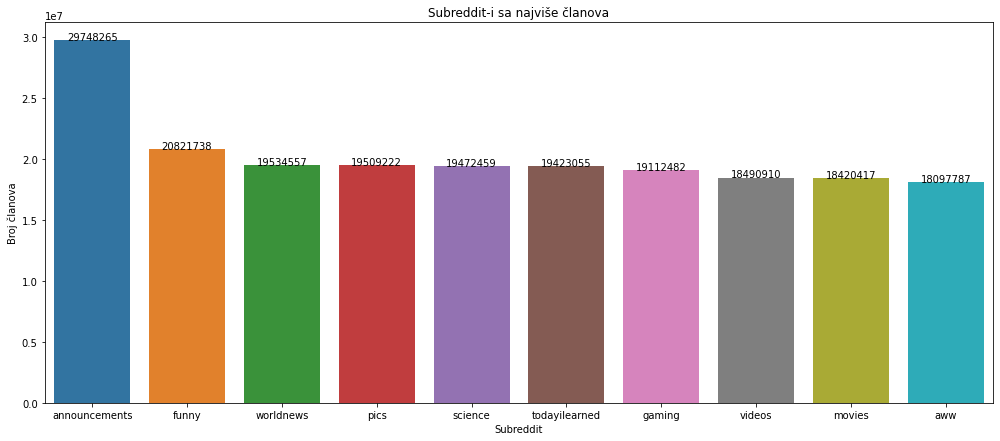

In [ ]:
g_comm.vertices.select("id","subscribers").filter("subscribers = 0").show()
sub10PD = g_comm.vertices.select("id","subscribers").orderBy("subscribers",ascending=False).withColumnRenamed("id","Subreddit").withColumnRenamed("subscribers","Broj članova").limit(10).toPandas()
print(sub10PD)
plt.figure(figsize=(17, 7))
sg_tops = sn.barplot(data=sub10PD, x="Subreddit", y="Broj članova")
plt.title("Subreddit-i sa najviše članova")
for index, row in sub10PD.iterrows():
    sg_tops.text(row.name,row["Broj članova"], row["Broj članova"], color='black', ha="center")
plt.savefig("top10_subreddits.png")

In [ ]:
g_comm.vertices.agg(F.avg(F.col("subscribers"))).show()

+----------------+
|avg(subscribers)|
+----------------+
|47781.6521670772|
+----------------+



In [ ]:
g2.vertices.orderBy("created_utc").show(1)
g2.vertices.orderBy("created_utc",ascending=False).show(1)

+----+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+----------+---------------------+---------------------+-------------------------+-----------------------+--------------+-------------------+--------------------+---------------------+--------------+---------------+--------+--------+-----------+-----------------+---------------+---------+----+------------------+-------------------+------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+-----------------+--------------+-----------+----------------------+-----------------+--------+
|  id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_videos|audience_target|banner_background_color|banner_background_image|banner_img|can

          Subreddit  Broj link-ova ka drugim subreddit-ima
0    subredditdrama                                  27636
1            bestof                                  21170
2         titlegore                                   9503
3    shitredditsays                                   7839
4             drama                                   6784
5          shitpost                                   6658
6      circlebroke2                                   6583
7        switcharoo                                   6039
8  shitamericanssay                                   5963
9     hailcorporate                                   5360


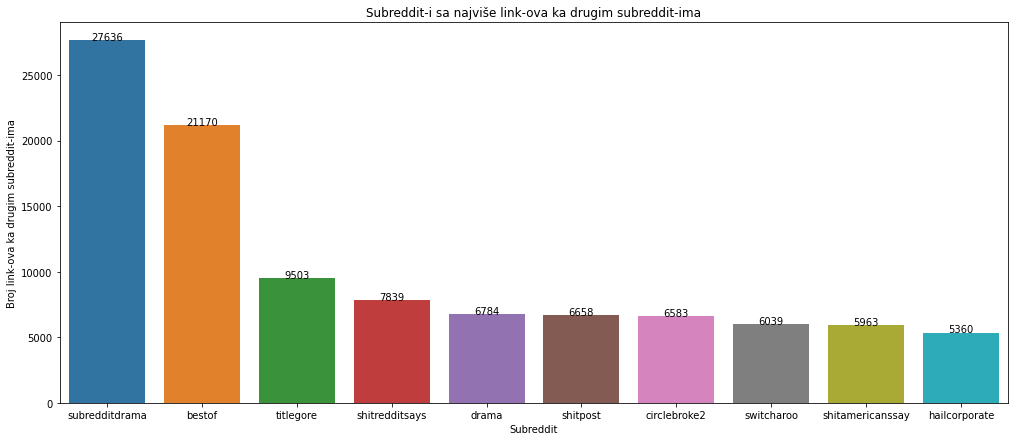

In [ ]:
outPD = g_comm.outDegrees.orderBy("outDegree",ascending=False).withColumnRenamed("id","Subreddit").withColumnRenamed("outDegree","Broj link-ova ka drugim subreddit-ima").limit(10).toPandas()
print(outPD)
plt.figure(figsize=(17, 7))
sg_out = sn.barplot(data=outPD, x="Subreddit", y="Broj link-ova ka drugim subreddit-ima")
plt.title("Subreddit-i sa najviše link-ova ka drugim subreddit-ima")
for index, row in outPD.iterrows():
    sg_out.text(row.name,row["Broj link-ova ka drugim subreddit-ima"], row["Broj link-ova ka drugim subreddit-ima"], color='black', ha="center")
plt.savefig("top10out_subreddits.png")

       Subreddit  Broj link-ova koji link-iji ovaj subreddit
0      askreddit                                       26622
1           iama                                       13446
2           pics                                       12578
3  todayilearned                                       11124
4          funny                                       10777
5         videos                                       10013
6      worldnews                                        9944
7           news                                        7692
8       politics                                        6114
9         gaming                                        6097


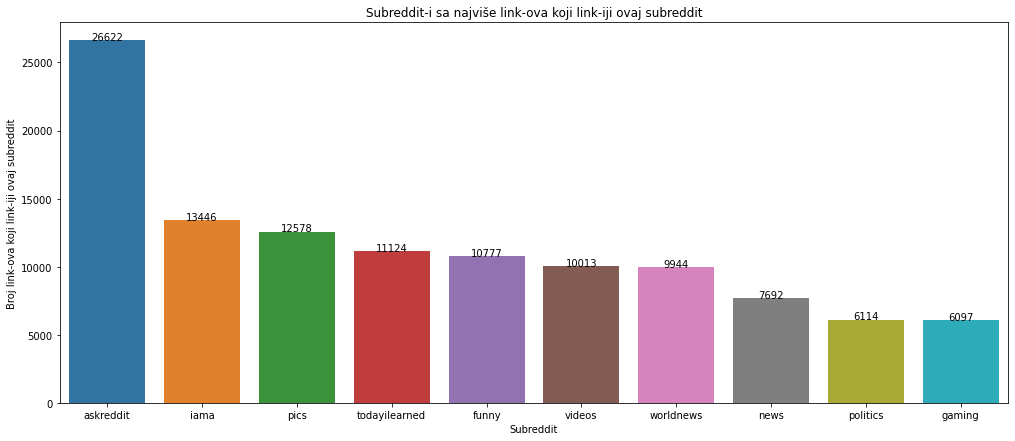

In [ ]:
inPD = g_comm.inDegrees.orderBy("inDegree",ascending=False).withColumnRenamed("id","Subreddit").withColumnRenamed("inDegree","Broj link-ova koji link-iji ovaj subreddit").limit(10).toPandas()
print(inPD)
plt.figure(figsize=(17, 7))
sg_in = sn.barplot(data=inPD, x="Subreddit", y="Broj link-ova koji link-iji ovaj subreddit")
plt.title("Subreddit-i sa najviše link-ova koji link-iji ovaj subreddit")
for index, row in inPD.iterrows():
    sg_in.text(row.name,row["Broj link-ova koji link-iji ovaj subreddit"], row["Broj link-ova koji link-iji ovaj subreddit"], color='black', ha="center")
plt.savefig("top10in_subreddits.png")

In [ ]:
g_comm.outDegrees.agg(F.avg(F.col("outDegree"))).show()
g_comm.inDegrees.agg(F.avg(F.col("inDegree"))).show()

+------------------+
|    avg(outDegree)|
+------------------+
|15.367738932746182|
+------------------+

+------------------+
|     avg(inDegree)|
+------------------+
|24.831887076246673|
+------------------+



          Subreddit  Broj link-ova sa pozitivnim/neutralnim sentimentom ka drugim subreddit-ima
0    subredditdrama                                              18649                         
1            bestof                                              17706                         
2         titlegore                                               9492                         
3    shitredditsays                                               6803                         
4        switcharoo                                               5711                         
5          shitpost                                               5350                         
6  shitamericanssay                                               5171                         
7     hailcorporate                                               4955                         
8      circlebroke2                                               4814                         
9             drama                     

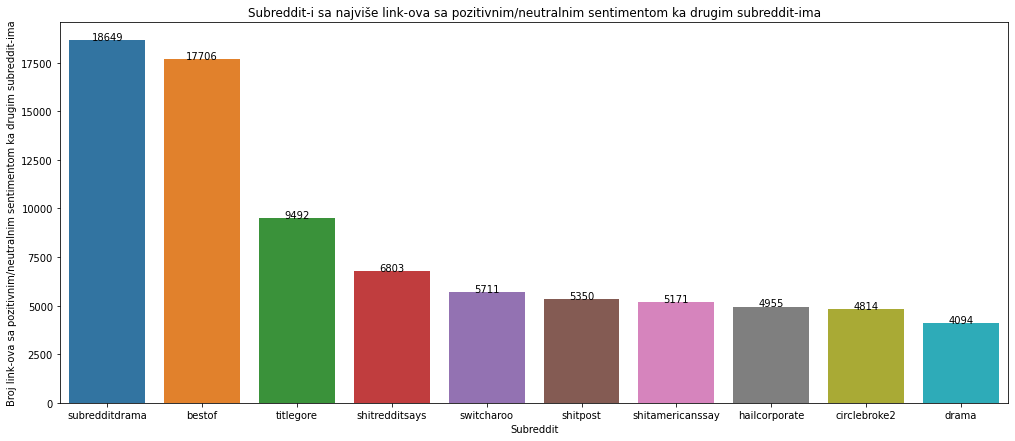

In [ ]:
out_posPD = g_comm_pos.outDegrees.orderBy("outDegree",ascending=False).withColumnRenamed("id","Subreddit").withColumnRenamed("outDegree","Broj link-ova sa pozitivnim/neutralnim sentimentom ka drugim subreddit-ima").limit(10).toPandas()
print(out_posPD)
plt.figure(figsize=(17, 7))
sg_out_pos = sn.barplot(data=out_posPD, x="Subreddit", y="Broj link-ova sa pozitivnim/neutralnim sentimentom ka drugim subreddit-ima")
plt.title("Subreddit-i sa najviše link-ova sa pozitivnim/neutralnim sentimentom ka drugim subreddit-ima")
for index, row in out_posPD.iterrows():
    sg_out_pos.text(row.name,row["Broj link-ova sa pozitivnim/neutralnim sentimentom ka drugim subreddit-ima"], row["Broj link-ova sa pozitivnim/neutralnim sentimentom ka drugim subreddit-ima"], color='black', ha="center")
plt.savefig("top10out_pos_subreddits.png")

       Subreddit  Broj link-ova sa pozitivnim/neutralnim sentimentom koji link-iji ovaj subreddit
0      askreddit                                              23256                              
1           iama                                              12744                              
2           pics                                              11103                              
3  todayilearned                                               9715                              
4          funny                                               9455                              
5         videos                                               8612                              
6      worldnews                                               8240                              
7           news                                               6068                              
8         gaming                                               5502                              
9       politics    

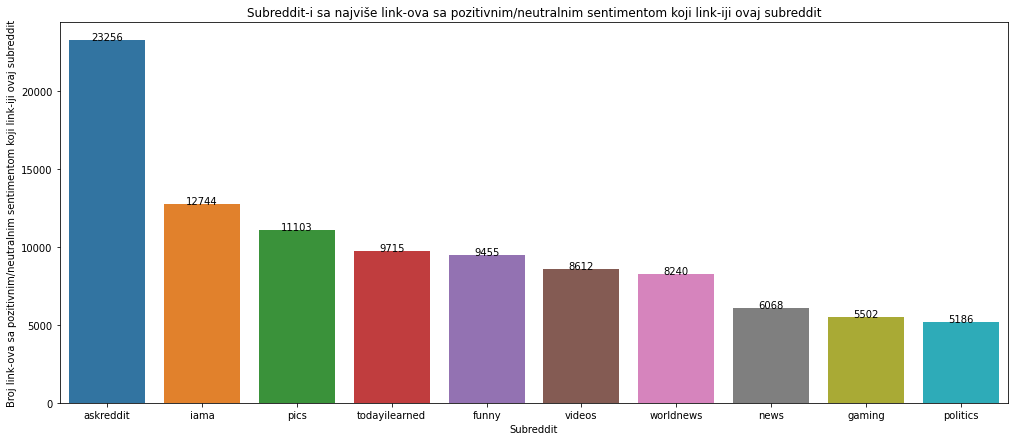

In [ ]:
in_posPD = g_comm_pos.inDegrees.orderBy("inDegree",ascending=False).withColumnRenamed("id","Subreddit").withColumnRenamed("inDegree","Broj link-ova sa pozitivnim/neutralnim sentimentom koji link-iji ovaj subreddit").limit(10).toPandas()
print(in_posPD)
plt.figure(figsize=(17, 7))
sg_in_pos = sn.barplot(data=in_posPD, x="Subreddit", y="Broj link-ova sa pozitivnim/neutralnim sentimentom koji link-iji ovaj subreddit")
plt.title("Subreddit-i sa najviše link-ova sa pozitivnim/neutralnim sentimentom koji link-iji ovaj subreddit")
for index, row in in_posPD.iterrows():
    sg_in_pos.text(row.name,row["Broj link-ova sa pozitivnim/neutralnim sentimentom koji link-iji ovaj subreddit"], row["Broj link-ova sa pozitivnim/neutralnim sentimentom koji link-iji ovaj subreddit"], color='black', ha="center")
plt.savefig("top10in_pos_subreddits.png")

In [ ]:
g_comm_pos.outDegrees.agg(F.avg(F.col("outDegree"))).show()
g_comm_pos.inDegrees.agg(F.avg(F.col("inDegree"))).show()

+-----------------+
|   avg(outDegree)|
+-----------------+
|14.18610771001992|
+-----------------+

+------------------+
|     avg(inDegree)|
+------------------+
|22.862637686281438|
+------------------+



          Subreddit  Broj link-ova sa negativnim sentimentom ka drugim subreddit-ima
0    subredditdrama                                               8987              
1            bestof                                               3464              
2             drama                                               2690              
3      circlebroke2                                               1769              
4          shitpost                                               1308              
5    shitredditsays                                               1036              
6   shitstatistssay                                                982              
7  shitamericanssay                                                792              
8          srssucks                                                782              
9       circlebroke                                                775              


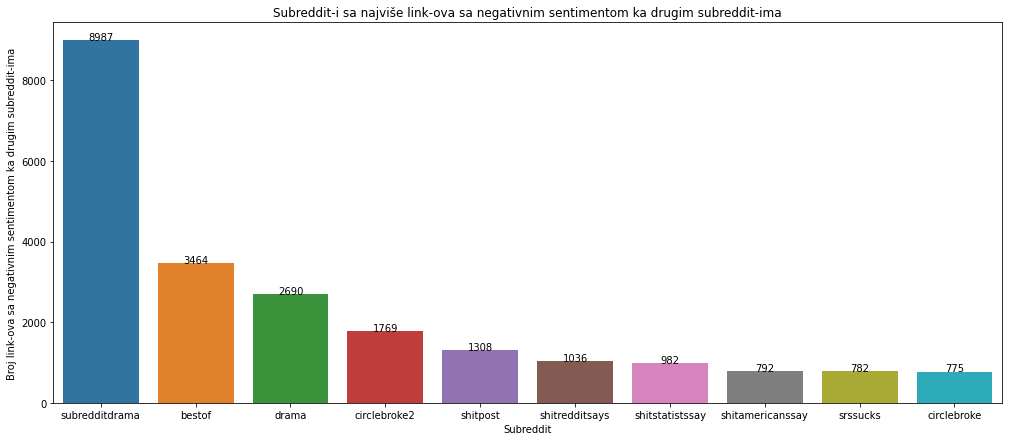

In [ ]:
out_negPD = g_comm_neg.outDegrees.orderBy("outDegree",ascending=False).withColumnRenamed("id","Subreddit").withColumnRenamed("outDegree","Broj link-ova sa negativnim sentimentom ka drugim subreddit-ima").limit(10).toPandas()
print(out_negPD)
plt.figure(figsize=(17, 7))
sg_out_neg = sn.barplot(data=out_negPD, x="Subreddit", y="Broj link-ova sa negativnim sentimentom ka drugim subreddit-ima")
plt.title("Subreddit-i sa najviše link-ova sa negativnim sentimentom ka drugim subreddit-ima")
for index, row in out_negPD.iterrows():
    sg_out_neg.text(row.name,row["Broj link-ova sa negativnim sentimentom ka drugim subreddit-ima"], row["Broj link-ova sa negativnim sentimentom ka drugim subreddit-ima"], color='black', ha="center")
plt.savefig("top10out_neg_subreddits.png")

       Subreddit  Broj link-ova sa negativnim sentimentom koji link-iji ovaj subreddit
0      askreddit                                               3366                   
1      worldnews                                               1704                   
2           news                                               1624                   
3           pics                                               1475                   
4  todayilearned                                               1409                   
5         videos                                               1401                   
6          funny                                               1322                   
7  adviceanimals                                               1063                   
8       politics                                                928                   
9            wtf                                                841                   


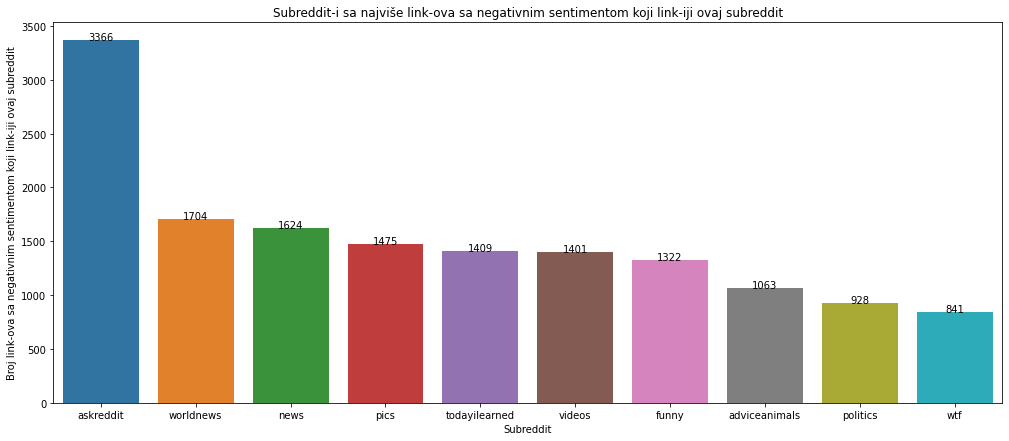

In [ ]:
in_negPD = g_comm_neg.inDegrees.orderBy("inDegree",ascending=False).withColumnRenamed("id","Subreddit").withColumnRenamed("inDegree","Broj link-ova sa negativnim sentimentom koji link-iji ovaj subreddit").limit(10).toPandas()
print(in_negPD)
plt.figure(figsize=(17, 7))
sg_in_neg = sn.barplot(data=in_negPD, x="Subreddit", y="Broj link-ova sa negativnim sentimentom koji link-iji ovaj subreddit")
plt.title("Subreddit-i sa najviše link-ova sa negativnim sentimentom koji link-iji ovaj subreddit")
for index, row in in_negPD.iterrows():
    sg_in_neg.text(row.name,row["Broj link-ova sa negativnim sentimentom koji link-iji ovaj subreddit"], row["Broj link-ova sa negativnim sentimentom koji link-iji ovaj subreddit"], color='black', ha="center")
plt.savefig("top10in_neg_subreddits.png")

In [ ]:
g_comm_neg.outDegrees.agg(F.avg(F.col("outDegree"))).show()
g_comm_neg.inDegrees.agg(F.avg(F.col("inDegree"))).show()

+-----------------+
|   avg(outDegree)|
+-----------------+
|9.451598068521498|
+-----------------+

+-----------------+
|    avg(inDegree)|
+-----------------+
|12.39035418236624|
+-----------------+



                     Broj link-ova
Sentiment link-a                  
negativan                    82210
pozitivan/neutralan         776278


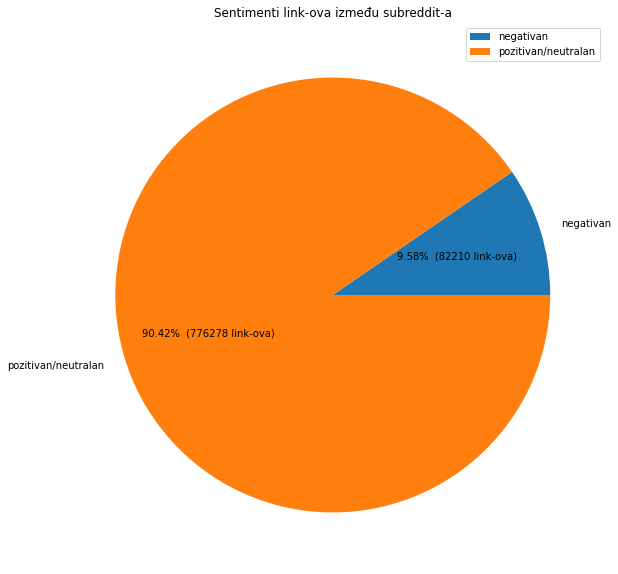

In [ ]:
linkPD = g2.edges.groupBy("LINK_SENTIMENT").count().withColumnRenamed("LINK_SENTIMENT","Sentiment link-a").withColumnRenamed("count","Broj link-ova").toPandas()
linkPD.iat[1,0] = "pozitivan/neutralan"
linkPD.iat[0,0] = "negativan"
linkPD = linkPD.set_index("Sentiment link-a")
print(linkPD)
linkPD.plot.pie(y=0,figsize=(10,10),title='Sentimenti link-ova između subreddit-a',autopct=lambda p : '{:.2f}%  ({:.0f} link-ova)'.format(p, 82210 if p<50 else 776278))
plt.ylabel("")
plt.savefig("link_sent.png")

In [ ]:
g_comm.vertices.groupBy("label").count().count()

5402

In [ ]:
g_comm.vertices.groupBy("label").count().withColumnRenamed("count", "community_size").groupBy("community_size").count().orderBy("community_size").show(6000)

+--------------+-----+
|community_size|count|
+--------------+-----+
|             1| 4875|
|             2|  168|
|             3|   69|
|             4|   50|
|             5|   42|
|             6|   26|
|             7|   16|
|             8|   13|
|             9|   15|
|            10|   12|
|            11|    5|
|            12|    4|
|            13|    7|
|            14|    6|
|            15|    5|
|            16|    7|
|            17|    6|
|            18|    3|
|            19|    5|
|            20|    2|
|            21|    1|
|            22|    4|
|            23|    5|
|            24|    2|
|            26|    3|
|            27|    5|
|            29|    6|
|            30|    2|
|            31|    2|
|            32|    2|
|            33|    2|
|            34|    2|
|            36|    2|
|            39|    2|
|            41|    1|
|            42|    1|
|            45|    2|
|            46|    1|
|            48|    1|
|            50|    1|
|          

In [ ]:
g_comm.vertices.groupBy("label").count().orderBy("count", ascending=False).show()

+-------------+-----+
|        label|count|
+-------------+-----+
| 317827579920| 7733|
| 223338299480| 1614|
|1056561954852|  153|
|  94489280556|   98|
| 773094113287|   92|
| 687194767445|   90|
|1537598292039|   89|
| 687194767454|   81|
| 429496729673|   76|
| 549755813912|   72|
| 455266533428|   68|
|1640677507122|   68|
| 154618822741|   65|
|1288490188835|   61|
|1546188226675|   58|
|1580547965001|   57|
| 730144440368|   55|
|1511828488221|   55|
|1331439861827|   55|
| 274877906954|   50|
+-------------+-----+
only showing top 20 rows



In [ ]:
g_comm.vertices.filter(g_comm.vertices.label == "317827579920").show(50)

+-------------------+-------------------------+--------------------+---------------+------------+---------------+------------+--------------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|                 id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_vide

In [ ]:
g_comm_pos.vertices.groupBy("label").count().count()

5337

In [ ]:
g_comm_pos.vertices.groupBy("label").count().withColumnRenamed("count", "community_size").groupBy("community_size").count().orderBy("community_size").show(6000)

+--------------+-----+
|community_size|count|
+--------------+-----+
|             1| 4824|
|             2|  168|
|             3|   62|
|             4|   50|
|             5|   43|
|             6|   27|
|             7|   15|
|             8|   13|
|             9|    9|
|            10|   12|
|            11|    7|
|            12|    6|
|            13|    5|
|            14|    7|
|            15|    5|
|            16|    5|
|            17|    4|
|            18|    4|
|            19|    6|
|            20|    2|
|            21|    4|
|            22|    1|
|            23|    6|
|            24|    2|
|            25|    3|
|            26|    1|
|            27|    1|
|            28|    3|
|            29|    3|
|            30|    2|
|            31|    3|
|            32|    2|
|            33|    3|
|            34|    2|
|            37|    2|
|            40|    1|
|            41|    1|
|            43|    1|
|            44|    2|
|            45|    2|
|          

In [ ]:
g_comm_neg.vertices.groupBy("label").count().count()

1688

In [ ]:
g_comm_neg.vertices.groupBy("label").count().withColumnRenamed("count", "community_size").groupBy("community_size").count().orderBy("community_size").show(6000)

+--------------+-----+
|community_size|count|
+--------------+-----+
|             1| 1527|
|             2|   72|
|             3|   28|
|             4|   17|
|             5|    7|
|             6|    5|
|             7|    4|
|             8|    8|
|             9|    3|
|            10|    3|
|            12|    1|
|            13|    2|
|            14|    1|
|            15|    1|
|            16|    2|
|            18|    1|
|            20|    1|
|            21|    1|
|            39|    1|
|            49|    1|
|           866|    1|
|          1210|    1|
+--------------+-----+



In [ ]:
g_comm_pos.vertices.groupBy("label").count().orderBy("count", ascending=False).show()

+-------------+-----+
|        label|count|
+-------------+-----+
| 317827579920| 8653|
| 223338299480|  797|
|1056561954852|  154|
|  94489280556|   98|
| 773094113287|   89|
| 687194767445|   87|
| 687194767454|   80|
| 549755813912|   72|
|1640677507119|   69|
| 455266533428|   66|
|1288490188834|   62|
| 154618822741|   60|
|1580547965000|   59|
|1546188226674|   59|
|1331439861825|   55|
|1511828488220|   54|
| 730144440368|   53|
| 627065225289|   48|
| 575525617690|   45|
| 901943132200|   45|
+-------------+-----+
only showing top 20 rows



In [ ]:
g_comm_neg.vertices.groupBy("label").count().orderBy("count", ascending=False).show()

+-------------+-----+
|        label|count|
+-------------+-----+
|1614907703298| 1210|
| 283467841551|  866|
| 317827579908|   49|
|1486058684416|   39|
| 274877906958|   21|
|1443109011469|   20|
| 429496729611|   18|
| 601295421452|   16|
| 438086664206|   16|
|1125281431570|   15|
| 231928234001|   14|
|1468878815235|   13|
| 214748364802|   13|
|1537598291992|   12|
| 927712935940|   10|
|1142461300739|   10|
|1683627180041|   10|
| 180388626449|    9|
|1434519076889|    9|
|1468878815243|    9|
+-------------+-----+
only showing top 20 rows



In [ ]:
g_comm_pos.vertices.filter(g_comm_pos.vertices.label == "317827579920").show(50)

+--------------------+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+--------------------+---------------------+---------------------+-------------------------+-----------------------+--------------------+--------------------+--------------------+---------------------+--------------+---------------+--------+--------------------+-----------+-----------------+---------------+---------+------------+----+------------------+-------------------+--------+----------------------------+------+-------------+--------------------+--------------+----------+-------------------+----------+------------------+----------------+---------------+--------------------+--------------------+--------------+-----------+----------------------+--------------------+--------------------+
|                  id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogi

In [ ]:
g_comm_neg.vertices.filter(g_comm_neg.vertices.label == "1614907703310").show(50)

+---+-------------------------+--------------------+---------------+------------+---------------+------------+---------------+-----------------------+-----------------------+----------+---------------------+---------------------+-------------------------+-----------------------+--------------+-----------+-----------+---------------------+--------------+---------------+--------+--------+-----------+-----------------+---------------+---------+-----+----+------------------+-------------------+----+----------------------------+------+-------------+------------------+--------------+----------+------------+----------+------------------+----------------+---------------+-----------+-----------------+--------------+-----------+----------------------+-----+---+
| id|accounts_active_is_fuzzed|all_original_content|allow_discovery|allow_images|allow_videogifs|allow_videos|audience_target|banner_background_color|banner_background_image|banner_img|can_assign_link_flair|can_assign_user_flair|collapse_

In [ ]:
g_comm.vertices.groupBy("label").count().filter(F.col("count") > 10).sample(0.1).take(7)

[Row(label=214748364854, count=18),
 Row(label=309237645315, count=19),
 Row(label=1331439861827, count=55),
 Row(label=601295421488, count=39),
 Row(label=962072674324, count=27),
 Row(label=1434519076959, count=42),
 Row(label=188978561064, count=12)]

In [ ]:
sample_comms = ["317827579920","223338299480","1056561954852","214748364854","309237645315","1331439861827","601295421488","962072674324","1434519076959","188978561064"]
for cty in sample_comms:
  print(cty)
  print(g_comm.vertices.filter(F.col("label")==cty).select("id").rdd.takeSample(False,20))
  print("-------------------------------------------------")

317827579920
[Row(id='ihateart'), Row(id='rarebooks'), Row(id='snorkeling'), Row(id='blackjack'), Row(id='orangutangifs'), Row(id='cormoran_strike'), Row(id='japanesecars'), Row(id='legalhelp'), Row(id='washu'), Row(id='kat_fud'), Row(id='independentmusic'), Row(id='unsentmessages'), Row(id='unitsd8u'), Row(id='madisonmusic'), Row(id='rosehulman'), Row(id='read_more'), Row(id='me_irl_neue'), Row(id='changeyourfont'), Row(id='fantasygolf'), Row(id='windowsphone')]
-------------------------------------------------
223338299480
[Row(id='soccerbanners'), Row(id='trudge'), Row(id='911truth'), Row(id='imaginarymaps'), Row(id='editing'), Row(id='blag'), Row(id='aynomamesreddit'), Row(id='drydockporn'), Row(id='ritforhire'), Row(id='panoramicsgonewrong'), Row(id='bologna'), Row(id='vegaslocals'), Row(id='foreignpolicy'), Row(id='wtfart'), Row(id='honey'), Row(id='trashy'), Row(id='adorableporn'), Row(id='randomactsofspeciosa'), Row(id='mmt_economics'), Row(id='highdeas')]
---------------------

In [ ]:
g_comm_pos.vertices.groupBy("label").count().filter(F.col("count") > 10).sample(0.1).take(7)

[Row(label=1529008357416, count=11),
 Row(label=214748364895, count=23),
 Row(label=987842478155, count=28),
 Row(label=1340029796367, count=17),
 Row(label=773094113287, count=89),
 Row(label=1357209665546, count=15),
 Row(label=34359738435, count=24)]

In [ ]:
sample_pos_comms = ["317827579920","223338299480","1056561954852","1529008357416","214748364895","987842478155","1340029796367","773094113287","1357209665546","34359738435"]
for cty in sample_pos_comms:
  print(cty)
  print(g_comm_pos.vertices.filter(F.col("label")==cty).select("id").rdd.takeSample(False,20))
  print("-------------------------------------------------")

317827579920
[Row(id='exredpill'), Row(id='fifthworldbigbang'), Row(id='usajobs'), Row(id='thingsinsidethings'), Row(id='autorepair'), Row(id='gyopo'), Row(id='towerporn'), Row(id='outsidephotography'), Row(id='imagehosting'), Row(id='flash'), Row(id='badphilosophy'), Row(id='fuckeatingdisorders'), Row(id='marketing'), Row(id='cormacmccarthy'), Row(id='relationship_guidance'), Row(id='vikingstv'), Row(id='cyprus'), Row(id='rickandmorty'), Row(id='toomuchcontext'), Row(id='wfmtm')]
-------------------------------------------------
223338299480
[Row(id='burritos'), Row(id='worldcryptonetwork'), Row(id='userproduced'), Row(id='wargamebootcamp'), Row(id='dangerousdesign'), Row(id='dishonoredlore'), Row(id='nevertellmetheodds'), Row(id='gwent'), Row(id='f7u12_ham'), Row(id='hollandmichigan'), Row(id='workgonewild'), Row(id='stormfront'), Row(id='poop'), Row(id='wallpapers'), Row(id='cover_this_song'), Row(id='mishacollins'), Row(id='freestylerap'), Row(id='asktrolly'), Row(id='giftcards4fre

In [ ]:
g_comm_neg.vertices.groupBy("label").count().filter(F.col("count") > 10).sample(0.8).take(7)

[Row(label=1443109011469, count=20),
 Row(label=231928234001, count=14),
 Row(label=274877906958, count=21),
 Row(label=1486058684416, count=39),
 Row(label=214748364802, count=13),
 Row(label=1468878815235, count=13),
 Row(label=601295421452, count=16)]

In [ ]:
sample_neg_comms = ["1614907703298","283467841551","317827579908","1443109011469","231928234001","274877906958","1486058684416","214748364802","1468878815235","601295421452"]
for cty in sample_neg_comms:
  print(cty)
  print(g_comm_neg.vertices.filter(F.col("label")==cty).select("id").rdd.takeSample(False,20))
  print("-------------------------------------------------")

1614907703298
[Row(id='baddoggy'), Row(id='adventuretime'), Row(id='studentloandefaulters'), Row(id='drunkenpeasants'), Row(id='minnesotavikings'), Row(id='brum'), Row(id='transhumanism'), Row(id='thesopranos'), Row(id='leaves'), Row(id='askpsychology'), Row(id='overpopulation'), Row(id='lolwut'), Row(id='magicskyfairy'), Row(id='raldi'), Row(id='kurdistan'), Row(id='transgender'), Row(id='youtubecomments'), Row(id='flextweak'), Row(id='bengals'), Row(id='fuckingmanly')]
-------------------------------------------------
283467841551
[Row(id='abortion'), Row(id='namenerds'), Row(id='organic'), Row(id='exmuslim'), Row(id='bestofislam'), Row(id='illusionporn'), Row(id='jobs'), Row(id='xkcd'), Row(id='golfcirclejerk'), Row(id='standupshots'), Row(id='rage'), Row(id='nononono'), Row(id='london'), Row(id='hookertalk'), Row(id='science'), Row(id='navy'), Row(id='hypotheticalsituation'), Row(id='tha_pit'), Row(id='youdontsurf'), Row(id='talesfromtechsupport')]
---------------------------------

In [ ]:
comm1 = {'subreddit': ["ihateart","rarebooks","snorkeling","blackjack","orangutangifs","cormoran_strike","japanesecars","legalhelp","washu","kat_fud","independentmusic","unsentmessages","unitsd8u","madisonmusic","rosehulman","read_more","me_irl_neue","changeyourfont","fantasygolf","windowsphone"],
         'opšta kategorija': ["kritika","knjige","hobi/sport","hobi/sport","životinje","knjige","automobili","pravo","edukacija","razno","muzika","razno","vesti","muzika","edukacija","knjige","zabava","kritika","sport","tehnologija"]
         }
comm2 = {'subreddit': ["soccerbanners","trudge","911truth","imaginarymaps","editing","blag","aynomamesreddit","drydockporn","ritforhire","panoramicsgonewrong","bologna","vegaslocals","foreignpolicy","wtfart","honey","trashy","adorableporn","randomactsofspeciosa","mmt_economics","highdeas"],
         'opšta kategorija': ["sport","sport","teorije zavere","kartografija","kreativnost","razno","kritika","brodovi","oglasi","zabava","lokacija","lokacija","politika","umetnost","posao","kritika","pornografija","donacije","ekonomija","razno"]
         }
comm3 = {'subreddit': ["runwaynudity","lesdom","cat_girls","scissoring","monster_cocks","lesbians","surprise_sex","spreading","agegapsex","squirting","datbuttfromthefront","nsfwcosplay","ballsdeepandcumming","porn_gifs","upset","femdom_gifs","flatchests","asshole","cumonclothes","tongue"],
         'opšta kategorija': ["pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","blog","pornografija","pornografija","pornografija","pornografija","pornografija"]
         }
comm4 = {'subreddit': ["interior_design","menfashion","femalefashion","glasses","jomers","bagchat","fashionadvice","malefashionadvice","womensfashion","findfashion","seguin","shoemaking","malefashionuk","madeinusa","onesiefashion","femalehairadvice","purses","shoppingaddiction"],
         'opšta kategorija': ["dizajn","moda","moda","moda","moda","moda","moda","moda","moda","moda","lokacija","moda","moda","oglasi","moda","moda","moda","moda"]
         }
comm5 = {'subreddit': ["starcrafthaircuts","castit","wintergaming","sc2partners","day9","leveldesign","allthingszerg","gwu","allthingsprotoss","starcraft_strategy","uchicago","greygoo","allthingsmech","onetruedong","thegdstudio","starcraft2","cynicalbritofficial","broodwar","dedgaem"],
         'opšta kategorija': ["video igrice","video igrice","video igrice","video igrice","video igrice","video igrice","video igrice","edukacija","video igrice","video igrice","edukacija","video igrice","video igrice","video igrice","video igrice","video igrice","video igrice","video igrice","video igrice"]
         }
comm6 = {'subreddit': ["devel","ccnaw","email","hipaa","servicenow","digitalsignage","pcicompliance","scom","serials","msp","dns","webroot","f5networks","usefulscripts","saltstack","adfs","webex","grouppolicy","servers","mainframe"],
         'opšta kategorija': ["tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","televizija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija"]
         }
comm7 = {'subreddit': ["outbackjesus","bostonceltics","denvernuggets","kings","skyfucker","true_nba","nbl","nbaconspiracy","lakers","wnba","memphisgrizzlies","fantasybball","heatfantasybasketball","billsimmons","dfs","sportsbook","rockets","capology","nba2","suns"],
         'opšta kategorija': ["sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport"]
         }
comm8 = {'subreddit': ["cryptoconomy","nyancat","btces","hypercrypto","dogeservice","burstcoin","cryptodev","vertmarket","litecoinbeg","duck","beg","rubycoin","ltcmarket","nyancoins","vericoin","cannacoin","makemecry","topmarket","altcoin","zectrader"],
         'opšta kategorija': ["kriptovaluta","zabava","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","životinje","donacije","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","razno","kriptovaluta","kriptovaluta","kriptovaluta"]
         }
comm9 = {'subreddit': ["sffpc","eset","buildapcvideoediting","fixapc","jadeempire","acdcgamer_dev","buildapchelp","buildapcsales","gigabyte","oldpc","techsupport","buildapcforme","gamingpc","nvidiots","buildalinuxpc","helpmebuildapc","pcmods","overclocking","suggestapc","gigabytegaming"],
         'opšta kategorija': ["tehnologija","tehnologija","tehnologija","tehnologija","video igrice","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija"]
         }
comm10 = {'subreddit': ["mtgjudge","mtgmarketwatch","lrcast","budgetdecks","letsmakeatcg","johnnys","foilpeels","bootlegmtg","magicmics","mtglimited","magicthecirclejerking","magicgathering"],
         'opšta kategorija': ["fizicke igrice","fizicke igrice","fizicke igrice","fizicke igrice","fizicke igrice","fizicke igrice","fizicke igrice","fizicke igrice","fizicke igrice","fizicke igrice","fizicke igrice","fizicke igrice"]
         }
comm1PD = pd.DataFrame(comm1, columns=["subreddit","opšta kategorija"])
print(comm1PD)
comm2PD = pd.DataFrame(comm2, columns=["subreddit","opšta kategorija"])
print(comm2PD)
comm3PD = pd.DataFrame(comm3, columns=["subreddit","opšta kategorija"])
print(comm3PD)
comm4PD = pd.DataFrame(comm4, columns=["subreddit","opšta kategorija"])
print(comm4PD)
comm5PD = pd.DataFrame(comm5, columns=["subreddit","opšta kategorija"])
print(comm5PD)
comm6PD = pd.DataFrame(comm6, columns=["subreddit","opšta kategorija"])
print(comm6PD)
comm7PD = pd.DataFrame(comm7, columns=["subreddit","opšta kategorija"])
print(comm7PD)
comm8PD = pd.DataFrame(comm8, columns=["subreddit","opšta kategorija"])
print(comm8PD)
comm9PD = pd.DataFrame(comm9, columns=["subreddit","opšta kategorija"])
print(comm9PD)
comm10PD = pd.DataFrame(comm10, columns=["subreddit","opšta kategorija"])
print(comm10PD)

           subreddit opšta kategorija
0           ihateart          kritika
1          rarebooks           knjige
2         snorkeling       hobi/sport
3          blackjack       hobi/sport
4      orangutangifs        životinje
5    cormoran_strike           knjige
6       japanesecars       automobili
7          legalhelp            pravo
8              washu        edukacija
9            kat_fud            razno
10  independentmusic           muzika
11    unsentmessages            razno
12          unitsd8u            vesti
13      madisonmusic           muzika
14        rosehulman        edukacija
15         read_more           knjige
16       me_irl_neue           zabava
17    changeyourfont          kritika
18       fantasygolf            sport
19      windowsphone      tehnologija
               subreddit opšta kategorija
0          soccerbanners            sport
1                 trudge            sport
2               911truth   teorije zavere
3          imaginarymaps     karto

In [ ]:
comm_pos1 = {'subreddit': ["exredpill","fifthworldbigbang","usajobs","thingsinsidethings","autorepair","gyopo","towerporn","outsidephotography","imagehosting","flash","badphilosophy","fuckeatingdisorders","marketing","cormacmccarthy","relationship_guidance","vikingstv","cyprus","rickandmorty","toomuchcontext","wfmtm"],
         'opšta kategorija': ["politika","televizija","posao","razno","automobili","demografska zajednica","fotografija","fotografija","fotografija","tehnologija","filozofija","zdravlje","marketing","knjige","ljubavne veze","televizija","lokacija","televizija","zabava","posao"]
         }
comm_pos2 = {'subreddit': ["burritos","worldcryptonetwork","userproduced","wargamebootcamp","dangerousdesign","dishonoredlore","nevertellmetheodds","gwent","f7u12_ham","hollandmichigan","workgonewild","stormfront","poop","wallpapers","cover_this_song","mishacollins","freestylerap","asktrolly","giftcards4free","pixelsorting"],
         'opšta kategorija': ["hrana","kriptovaluta","muzika","video igrice","dizajn","video igrice","razno","video igrice","zabava","lokacija","pornografija","meteorologija","slike","slike","muzika","ličnost","muzika","razno","donacije","umetnost"]
         }
comm_pos3 = {'subreddit': ["ravergirls","collared","swimsuitsex","orgasm_gif_squirt","suctiondildos","distension","bestofcollege","castingcall","cumsluts","cfnmfetish","pantyslide","collegesluts","onoffcollages","chickflixxx","coveredincum","japanpornstars","deepthroat","damngoodinterracial","pulsatingcumshots","youboobers"],
         'opšta kategorija': ["moda","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija","pornografija"]
         }
comm_pos4 = {'subreddit': ["fcpx","macserver","mac","db2_","applehelp_betas","ipod","applescript","bootcamp","winehq","phonerepair","osx"],
         'opšta kategorija': ["kreativnost","tehnologija","tehnologija","razno","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija"]
         }
comm_pos5 = {'subreddit': ["nowow","wowbot","worldofpvp","redditguild","freesia","wowservers","wownoob","wowaddons","wowcirclejerk","rule34gifs","warcraftmovie","warcraftrogues","wowmeta","theblackharvest","warcraftdadjokes","woweconomy","livetiles","hiddenwow","wowleveling","exinferno"],
         'opšta kategorija': ["video igrice","video igrice","video igrice","video igrice","video igrice","video igrice","video igrice","video igrice","video igrice","pornografija","film","video igrice","video igrice","video igrice","video igrice","video igrice","tehnologija","video igrice","video igrice","video igrice"]
         }
comm_pos6 = {'subreddit': ["rangersfc","soccerbooks","bcfc","palmeiras","chelseafc","soccerstreams","gremio","rbny","bvbcirclejerk","coyswallpapers","footballdownload","afcwimbledon","sascorpionsfc","superhoops","bengalurufc","futbolmx","footballhighlights","hotsoccerfans","seriea","botafogo"],
         'opšta kategorija': ["sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport"]
         }
comm_pos7 = {'subreddit': ["reddittips","blockchainanalysis","joinmarket","bitcoin_unlimited","decred","voteflux","steemit","bitcoinatms","btcfork","bitcoin_uncensored","dashpay","bitcoinxt","tezos","bitcoin_nodes","bitcoinscaling","mtgoxinsolvency","bitcoin_censored"],
         'opšta kategorija': ["saveti","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","kriptovaluta","tehnologija","kriptovaluta","kriptovaluta","kriptovaluta"]
         }
comm_pos8 = {'subreddit': ["soccernerd","gay_soccer","realmadrid","soccergifs","lcfc","bournemouth","bwfc","internacional","safc","benfica","libertadores","footballtickets","aleaguematchday","nense","achtzehn99","nzfootball","soccergaming","soccerlinks","fcsp","chadpc"],
         'opšta kategorija': ["sport","sport","sport","sport","sport","lokacija","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport"]
         }
comm_pos9 = {'subreddit': ["bikepacking","bicycling","roadcycling","bustedcarbon","bikefit","wintercycling","citybike","tandem","miamibiking","bikedeals","wheelbuild","folsom","bicycleculture","gravelcycling","recumbent"],
         'opšta kategorija': ["biciklizam","biciklizam","biciklizam","biciklizam","biciklizam","biciklizam","biciklizam","biciklizam","biciklizam","biciklizam","biciklizam","lokacija","biciklizam","biciklizam","biciklizam"]
         }
comm_pos10 = {'subreddit': ["originalxbox","diydsp","pcontests","gamecollectingjerk","retrogameswap","mygamecollection_app","vintagecomputing","c128","gameswap","oldcomputers","computercollecting","casemods","crt","flashcarts","symbian","atarist","historyofcomputers","odyssey2","toshiba","trinitron"],
         'opšta kategorija': ["tehnologija","tehnologija","tehnologija","video igrice","video igrice","video igrice","tehnologija","tehnologija","video igrice","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija"]
         }
comm_pos1PD = pd.DataFrame(comm_pos1, columns=["subreddit","opšta kategorija"])
print(comm_pos1PD)
comm_pos2PD = pd.DataFrame(comm_pos2, columns=["subreddit","opšta kategorija"])
print(comm_pos2PD)
comm_pos3PD = pd.DataFrame(comm_pos3, columns=["subreddit","opšta kategorija"])
print(comm_pos3PD)
comm_pos4PD = pd.DataFrame(comm_pos4, columns=["subreddit","opšta kategorija"])
print(comm_pos4PD)
comm_pos5PD = pd.DataFrame(comm_pos5, columns=["subreddit","opšta kategorija"])
print(comm_pos5PD)
comm_pos6PD = pd.DataFrame(comm_pos6, columns=["subreddit","opšta kategorija"])
print(comm_pos6PD)
comm_pos7PD = pd.DataFrame(comm_pos7, columns=["subreddit","opšta kategorija"])
print(comm_pos7PD)
comm_pos8PD = pd.DataFrame(comm_pos8, columns=["subreddit","opšta kategorija"])
print(comm_pos8PD)
comm_pos9PD = pd.DataFrame(comm_pos9, columns=["subreddit","opšta kategorija"])
print(comm_pos9PD)
comm_pos10PD = pd.DataFrame(comm_pos10, columns=["subreddit","opšta kategorija"])
print(comm_pos10PD)

                subreddit       opšta kategorija
0               exredpill               politika
1       fifthworldbigbang             televizija
2                 usajobs                  posao
3      thingsinsidethings                  razno
4              autorepair             automobili
5                   gyopo  demografska zajednica
6               towerporn            fotografija
7      outsidephotography            fotografija
8            imagehosting            fotografija
9                   flash            tehnologija
10          badphilosophy             filozofija
11    fuckeatingdisorders               zdravlje
12              marketing              marketing
13         cormacmccarthy                 knjige
14  relationship_guidance          ljubavne veze
15              vikingstv             televizija
16                 cyprus               lokacija
17           rickandmorty             televizija
18         toomuchcontext                 zabava
19                  

In [ ]:
comm_neg1 = {'subreddit': ["baddoggy","adventuretime","studentloandefaulters","drunkenpeasants","minnesotavikings","brum","transhumanism","thesopranos","leaves","askpsychology","overpopulation","lolwut","magicskyfairy","raldi","kurdistan","transgender","youtubecomments","flextweak","bengals","fuckingmanly"],
         'opšta kategorija': ["kritika","televizija","saveti","podcast","sport","lokacija","tehnologija","televizija","zajednica za podršku","psihologija","politika","zabava","zabava","razno","lokacija","demografska zajednica","kritika","tehnologija","sport","razno"]
         }
comm_neg2 = {'subreddit': ["abortion","namenerds","organic","exmuslim","bestofislam","illusionporn","jobs","xkcd","golfcirclejerk","standupshots","rage","nononono","london","hookertalk","science","navy","hypotheticalsituation","tha_pit","youdontsurf","talesfromtechsupport"],
         'opšta kategorija': ["zdravlje","imena","hrana","religija","religija","zabava","posao","strip","sport","komedija","kritika","razno","lokacija","hobi","nauka","vojska","razno","nepoznato","zabava","posao"]
         }
comm_neg3 = {'subreddit': ["gurrenlagann","trueloseit","bleach","gainers","araragi","animecirclejerk","swanseacity","mirainikki","redditliars","mitsubishi","gay_soccer","atletico","fcbayern","eurekaseven","cowboybebop","fulbo","xxprogresspics","helpmecope","wholisticenchilada","reddevils"],
         'opšta kategorija': ["televizija","zdravlje","televizija","pornografija","televizija","televizija","lokacija","televizija","kritika","automobili","sport","sport","sport","televizija","televizija","sport","zdravlje","zdravlje","filozofija","sport"]
         }
comm_neg4 = {'subreddit': ["riseagainst","losangeleskings","norfolkadmirals","templeofthephil","wildhockey","penguins","leafs","caps","stevedangle","fucktherangers","metropolitan","canes","staircasewit","winnipegjets","canucks","hockeycirclejerk","hawks","hockeyjerseys","devils","sabres"],
         'opšta kategorija': ["muzika","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","saveti","sport","sport","sport","sport","sport","sport","sport"]
         }
comm_neg5 = {'subreddit': ["alberta","saskatchewan","canadia","saskatoon","butthurtcanada","ottawa","yycog","toronto","ontario","canadients","metametacanada","quadmetacanada","britishcolumbia","onguardforthee"],
         'opšta kategorija': ["kanada","kanada","kanada","kanada","kanada","kanada","kanada","kanada","kanada","kanada","kanada","kanada","kanada","kanada"]
         }
comm_neg6 = {'subreddit': ["movingtojapan","r4rasian","postrock","sushi","japan","myfriendwantstoknow","japanese","japanlife","japanesemusic","textdoor","translator","hiphopjapan","teachinginjapan","moronarmy","japaneseunderground","fukuoka","veganinjapan","normaldayinjapan","forhire","japanpics"],
         'opšta kategorija': ["japan","ljubavne veze","muzika","hrana","saveti","japan","japan","japan","razno","japan","oglasi","japan","japan","japan","japan","japan","japan","japan","oglasi","japan"]
         }
comm_neg7 = {'subreddit': ["crossfit","steroids","yoga","gainit","4hourbodyslowcarb","kookietestsub","minimalism","physicaltherapy","1200isplentyketo","hiking","broslikeus","budgetfood","kettlebell","indepthstories","xxfitness","naturalbodybuilding","powerlifting","bjj","sanantoniocirclejerk","zerocarb"],
         'opšta kategorija': ["fitnes","fitnes","fitnes","fitnes","hrana","razno","filozofija","zdravlje","hrana","fitnes","pornografija","hrana","fitnes","vesti","fitnes","fitnes","sport","sport","razno","hrana"]
         }
comm_neg8 = {'subreddit': ["osx","galaxynote4","samsung","galaxynote5","iphonehelp","botwatch","verizon","mobilerepair","androidcirclejerk","lgv20","oneplusone","apolloapp","ios"],
         'opšta kategorija': ["tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija"]
         }
comm_neg9 = {'subreddit': ["stupidcomments","computers","buildapc","reddithelp","24hoursupport","openwrt","buildmeapc","chrome","itsaunixsystem","windows","yahoo","techhelp","pcgamingtechsupport"],
         'opšta kategorija': ["kritika","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija","tehnologija"]
         }
comm_neg10 = {'subreddit': ["raptorscirclejerk","comedy","timberwolves","sixers","nbacirclejerk","clevelandcavs","skyfucker","suns","heat","memphisgrizzlies","kings","denvernuggets","washingtonwizards","rockets","fantasybball","politicallyincorrect"],
         'opšta kategorija': ["sport","komedija","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","sport","kritika"]
         }
comm_neg1PD = pd.DataFrame(comm_neg1, columns=["subreddit","opšta kategorija"])
print(comm_neg1PD)
comm_neg2PD = pd.DataFrame(comm_neg2, columns=["subreddit","opšta kategorija"])
print(comm_neg2PD)
comm_neg3PD = pd.DataFrame(comm_neg3, columns=["subreddit","opšta kategorija"])
print(comm_neg3PD)
comm_neg4PD = pd.DataFrame(comm_neg4, columns=["subreddit","opšta kategorija"])
print(comm_neg4PD)
comm_neg5PD = pd.DataFrame(comm_neg5, columns=["subreddit","opšta kategorija"])
print(comm_neg5PD)
comm_neg6PD = pd.DataFrame(comm_neg6, columns=["subreddit","opšta kategorija"])
print(comm_neg6PD)
comm_neg7PD = pd.DataFrame(comm_neg7, columns=["subreddit","opšta kategorija"])
print(comm_neg7PD)
comm_neg8PD = pd.DataFrame(comm_neg8, columns=["subreddit","opšta kategorija"])
print(comm_neg8PD)
comm_neg9PD = pd.DataFrame(comm_neg9, columns=["subreddit","opšta kategorija"])
print(comm_neg9PD)
comm_neg10PD = pd.DataFrame(comm_neg10, columns=["subreddit","opšta kategorija"])
print(comm_neg10PD)

                subreddit       opšta kategorija
0                baddoggy                kritika
1           adventuretime             televizija
2   studentloandefaulters                 saveti
3         drunkenpeasants                podcast
4        minnesotavikings                  sport
5                    brum               lokacija
6           transhumanism            tehnologija
7             thesopranos             televizija
8                  leaves   zajednica za podršku
9           askpsychology            psihologija
10         overpopulation               politika
11                 lolwut                 zabava
12          magicskyfairy                 zabava
13                  raldi                  razno
14              kurdistan               lokacija
15            transgender  demografska zajednica
16        youtubecomments                kritika
17              flextweak            tehnologija
18                bengals                  sport
19           fucking

In [ ]:
comm1GBPD = comm1PD.groupby(["opšta kategorija"]).count()
print(comm1GBPD)
comm2GBPD = comm2PD.groupby(["opšta kategorija"]).count()
print(comm2GBPD)
comm3GBPD = comm3PD.groupby(["opšta kategorija"]).count()
print(comm3GBPD)
comm4GBPD = comm4PD.groupby(["opšta kategorija"]).count()
print(comm4GBPD)
comm5GBPD = comm5PD.groupby(["opšta kategorija"]).count()
print(comm5GBPD)
comm6GBPD = comm6PD.groupby(["opšta kategorija"]).count()
print(comm6GBPD)
comm7GBPD = comm7PD.groupby(["opšta kategorija"]).count()
print(comm7GBPD)
comm8GBPD = comm8PD.groupby(["opšta kategorija"]).count()
print(comm8GBPD)
comm9GBPD = comm9PD.groupby(["opšta kategorija"]).count()
print(comm9GBPD)
comm10GBPD = comm10PD.groupby(["opšta kategorija"]).count()
print(comm10GBPD)

                  subreddit
opšta kategorija           
automobili                1
edukacija                 2
hobi/sport                2
knjige                    3
kritika                   2
muzika                    2
pravo                     1
razno                     2
sport                     1
tehnologija               1
vesti                     1
zabava                    1
životinje                 1
                  subreddit
opšta kategorija           
brodovi                   1
donacije                  1
ekonomija                 1
kartografija              1
kreativnost               1
kritika                   2
lokacija                  2
oglasi                    1
politika                  1
pornografija              1
posao                     1
razno                     2
sport                     2
teorije zavere            1
umetnost                  1
zabava                    1
                  subreddit
opšta kategorija           
blog                

In [ ]:
comm_pos1GBPD = comm_pos1PD.groupby(["opšta kategorija"]).count()
print(comm_pos1GBPD)
comm_pos2GBPD = comm_pos2PD.groupby(["opšta kategorija"]).count()
print(comm_pos2GBPD)
comm_pos3GBPD = comm_pos3PD.groupby(["opšta kategorija"]).count()
print(comm_pos3GBPD)
comm_pos4GBPD = comm_pos4PD.groupby(["opšta kategorija"]).count()
print(comm_pos4GBPD)
comm_pos5GBPD = comm_pos5PD.groupby(["opšta kategorija"]).count()
print(comm_pos5GBPD)
comm_pos6GBPD = comm_pos6PD.groupby(["opšta kategorija"]).count()
print(comm_pos6GBPD)
comm_pos7GBPD = comm_pos7PD.groupby(["opšta kategorija"]).count()
print(comm_pos7GBPD)
comm_pos8GBPD = comm_pos8PD.groupby(["opšta kategorija"]).count()
print(comm_pos8GBPD)
comm_pos9GBPD = comm_pos9PD.groupby(["opšta kategorija"]).count()
print(comm_pos9GBPD)
comm_pos10GBPD = comm_pos10PD.groupby(["opšta kategorija"]).count()
print(comm_pos10GBPD)

                       subreddit
opšta kategorija                
automobili                     1
demografska zajednica          1
filozofija                     1
fotografija                    3
knjige                         1
ljubavne veze                  1
lokacija                       1
marketing                      1
politika                       1
posao                          2
razno                          1
tehnologija                    1
televizija                     3
zabava                         1
zdravlje                       1
                  subreddit
opšta kategorija           
dizajn                    1
donacije                  1
hrana                     1
kriptovaluta              1
ličnost                   1
lokacija                  1
meteorologija             1
muzika                    3
pornografija              1
razno                     2
slike                     2
umetnost                  1
video igrice              3
zabava             

In [ ]:
comm_neg1GBPD = comm_neg1PD.groupby(["opšta kategorija"]).count()
print(comm_neg1GBPD)
comm_neg2GBPD = comm_neg2PD.groupby(["opšta kategorija"]).count()
print(comm_neg2GBPD)
comm_neg3GBPD = comm_neg3PD.groupby(["opšta kategorija"]).count()
print(comm_neg3GBPD)
comm_neg4GBPD = comm_neg4PD.groupby(["opšta kategorija"]).count()
print(comm_neg4GBPD)
comm_neg5GBPD = comm_neg5PD.groupby(["opšta kategorija"]).count()
print(comm_neg5GBPD)
comm_neg6GBPD = comm_neg6PD.groupby(["opšta kategorija"]).count()
print(comm_neg6GBPD)
comm_neg7GBPD = comm_neg7PD.groupby(["opšta kategorija"]).count()
print(comm_neg7GBPD)
comm_neg8GBPD = comm_neg8PD.groupby(["opšta kategorija"]).count()
print(comm_neg8GBPD)
comm_neg9GBPD = comm_neg9PD.groupby(["opšta kategorija"]).count()
print(comm_neg9GBPD)
comm_neg10GBPD = comm_neg10PD.groupby(["opšta kategorija"]).count()
print(comm_neg10GBPD)

                       subreddit
opšta kategorija                
demografska zajednica          1
kritika                        2
lokacija                       2
podcast                        1
politika                       1
psihologija                    1
razno                          2
saveti                         1
sport                          2
tehnologija                    2
televizija                     2
zabava                         2
zajednica za podršku           1
                  subreddit
opšta kategorija           
hobi                      1
hrana                     1
imena                     1
komedija                  1
kritika                   1
lokacija                  1
nauka                     1
nepoznato                 1
posao                     2
razno                     2
religija                  2
sport                     1
strip                     1
vojska                    1
zabava                    2
zdravlje                  1
 

In [ ]:
comm1GBPD.index

Index(['automobili', 'edukacija', 'hobi/sport', 'knjige', 'kritika', 'muzika',
       'pravo', 'razno', 'sport', 'tehnologija', 'vesti', 'zabava',
       'životinje'],
      dtype='object', name='opšta kategorija')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  

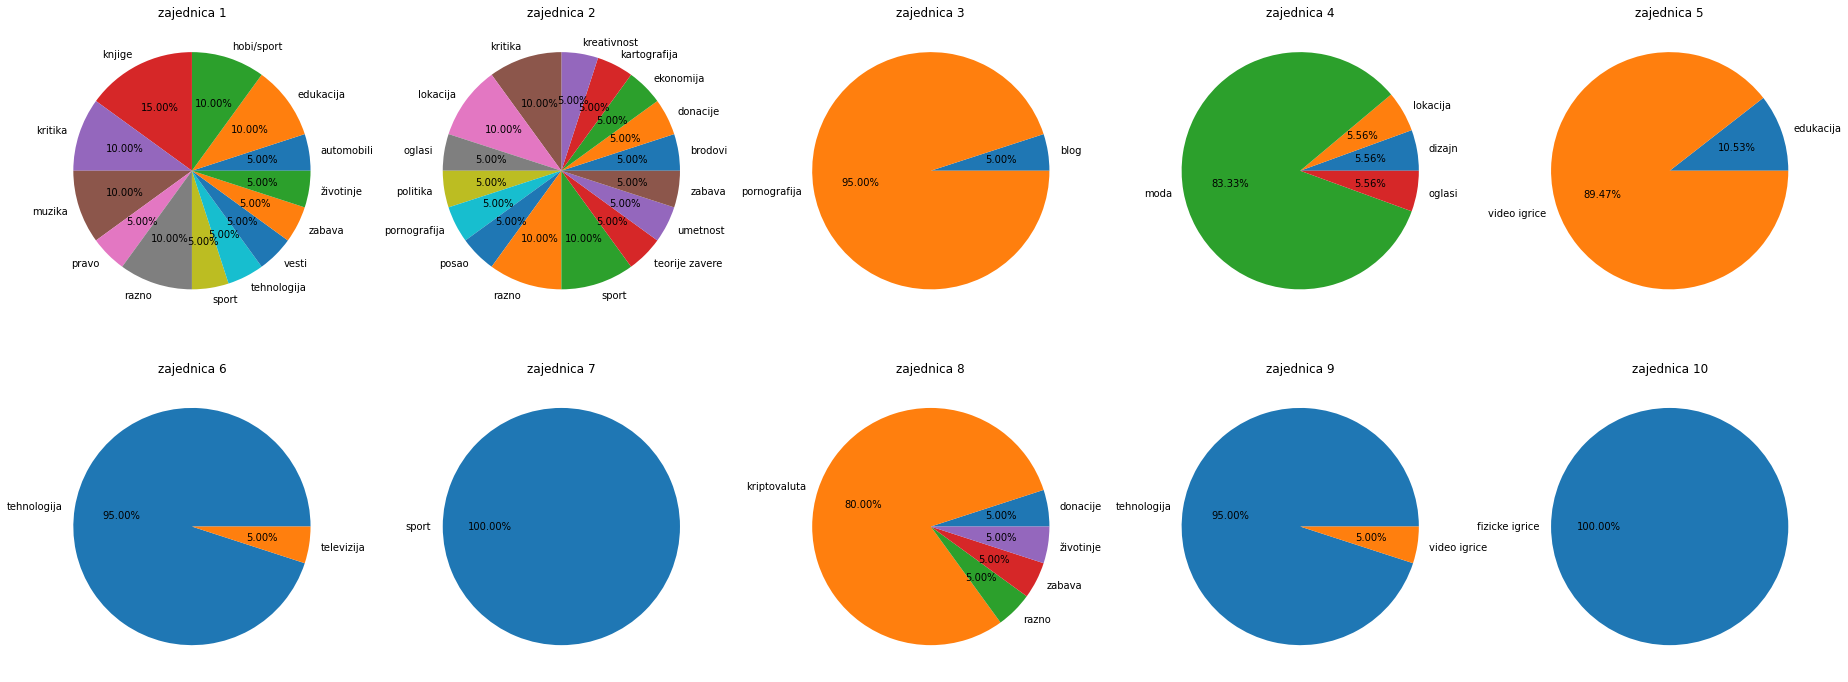

In [ ]:
fig, axs = plt.subplots(2, 5)
axs[0,0].pie(comm1GBPD, labels=comm1GBPD.index, autopct='%1.2f%%')
axs[0,0].set_title("zajednica 1")
axs[0,1].pie(comm2GBPD, labels=comm2GBPD.index, autopct='%1.2f%%')
axs[0,1].set_title("zajednica 2")
axs[0,2].pie(comm3GBPD, labels=comm3GBPD.index, autopct='%1.2f%%')
axs[0,2].set_title("zajednica 3")
axs[0,3].pie(comm4GBPD, labels=comm4GBPD.index, autopct='%1.2f%%')
axs[0,3].set_title("zajednica 4")
axs[0,4].pie(comm5GBPD, labels=comm5GBPD.index, autopct='%1.2f%%')
axs[0,4].set_title("zajednica 5")
axs[1,0].pie(comm6GBPD, labels=comm6GBPD.index, autopct='%1.2f%%')
axs[1,0].set_title("zajednica 6")
axs[1,1].pie(comm7GBPD, labels=comm7GBPD.index, autopct='%1.2f%%')
axs[1,1].set_title("zajednica 7")
axs[1,2].pie(comm8GBPD, labels=comm8GBPD.index, autopct='%1.2f%%')
axs[1,2].set_title("zajednica 8")
axs[1,3].pie(comm9GBPD, labels=comm9GBPD.index, autopct='%1.2f%%')
axs[1,3].set_title("zajednica 9")
axs[1,4].pie(comm10GBPD, labels=comm10GBPD.index, autopct='%1.2f%%')
axs[1,4].set_title("zajednica 10")
fig.set_size_inches(32,12)
plt.savefig("commhom.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  

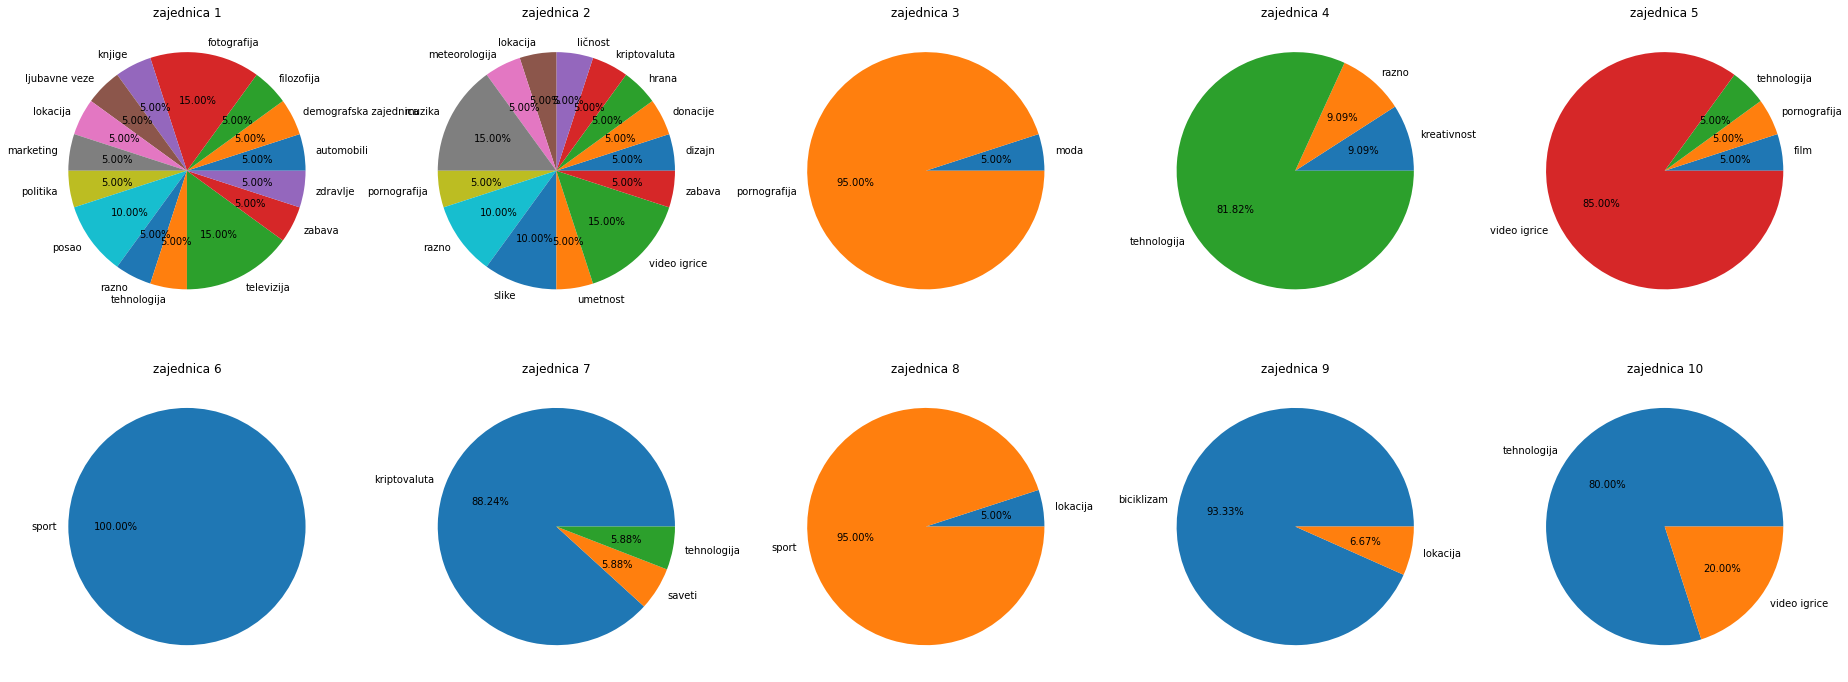

In [ ]:
fig, axs = plt.subplots(2, 5)
axs[0,0].pie(comm_pos1GBPD, labels=comm_pos1GBPD.index, autopct='%1.2f%%')
axs[0,0].set_title("zajednica 1")
axs[0,1].pie(comm_pos2GBPD, labels=comm_pos2GBPD.index, autopct='%1.2f%%')
axs[0,1].set_title("zajednica 2")
axs[0,2].pie(comm_pos3GBPD, labels=comm_pos3GBPD.index, autopct='%1.2f%%')
axs[0,2].set_title("zajednica 3")
axs[0,3].pie(comm_pos4GBPD, labels=comm_pos4GBPD.index, autopct='%1.2f%%')
axs[0,3].set_title("zajednica 4")
axs[0,4].pie(comm_pos5GBPD, labels=comm_pos5GBPD.index, autopct='%1.2f%%')
axs[0,4].set_title("zajednica 5")
axs[1,0].pie(comm_pos6GBPD, labels=comm_pos6GBPD.index, autopct='%1.2f%%')
axs[1,0].set_title("zajednica 6")
axs[1,1].pie(comm_pos7GBPD, labels=comm_pos7GBPD.index, autopct='%1.2f%%')
axs[1,1].set_title("zajednica 7")
axs[1,2].pie(comm_pos8GBPD, labels=comm_pos8GBPD.index, autopct='%1.2f%%')
axs[1,2].set_title("zajednica 8")
axs[1,3].pie(comm_pos9GBPD, labels=comm_pos9GBPD.index, autopct='%1.2f%%')
axs[1,3].set_title("zajednica 9")
axs[1,4].pie(comm_pos10GBPD, labels=comm_pos10GBPD.index, autopct='%1.2f%%')
axs[1,4].set_title("zajednica 10")
fig.set_size_inches(32,12)
plt.savefig("commhom_pos.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  

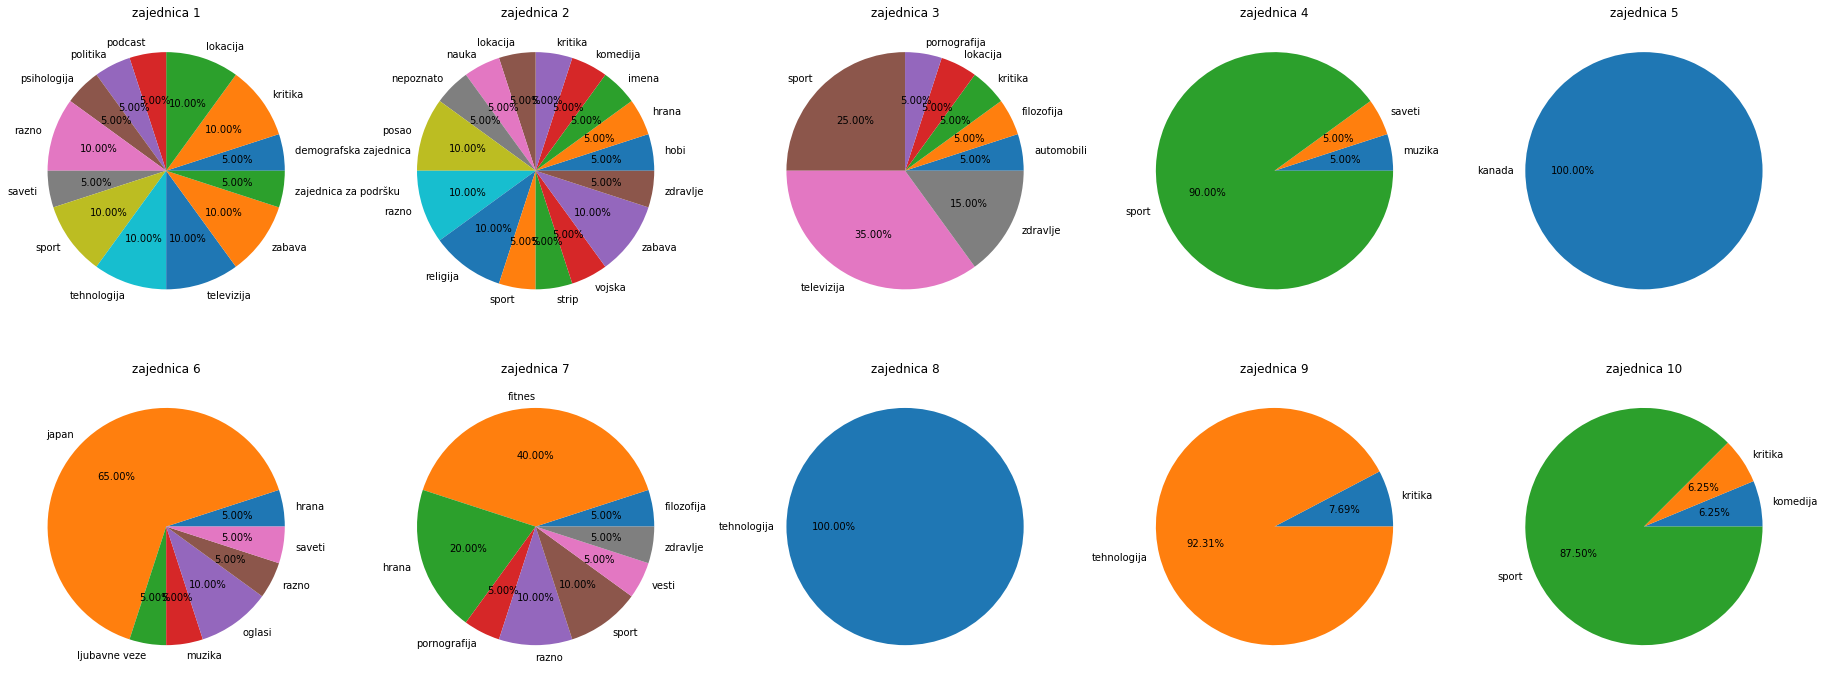

In [ ]:
fig, axs = plt.subplots(2, 5)
axs[0,0].pie(comm_neg1GBPD, labels=comm_neg1GBPD.index, autopct='%1.2f%%')
axs[0,0].set_title("zajednica 1")
axs[0,1].pie(comm_neg2GBPD, labels=comm_neg2GBPD.index, autopct='%1.2f%%')
axs[0,1].set_title("zajednica 2")
axs[0,2].pie(comm_neg3GBPD, labels=comm_neg3GBPD.index, autopct='%1.2f%%')
axs[0,2].set_title("zajednica 3")
axs[0,3].pie(comm_neg4GBPD, labels=comm_neg4GBPD.index, autopct='%1.2f%%')
axs[0,3].set_title("zajednica 4")
axs[0,4].pie(comm_neg5GBPD, labels=comm_neg5GBPD.index, autopct='%1.2f%%')
axs[0,4].set_title("zajednica 5")
axs[1,0].pie(comm_neg6GBPD, labels=comm_neg6GBPD.index, autopct='%1.2f%%')
axs[1,0].set_title("zajednica 6")
axs[1,1].pie(comm_neg7GBPD, labels=comm_neg7GBPD.index, autopct='%1.2f%%')
axs[1,1].set_title("zajednica 7")
axs[1,2].pie(comm_neg8GBPD, labels=comm_neg8GBPD.index, autopct='%1.2f%%')
axs[1,2].set_title("zajednica 8")
axs[1,3].pie(comm_neg9GBPD, labels=comm_neg9GBPD.index, autopct='%1.2f%%')
axs[1,3].set_title("zajednica 9")
axs[1,4].pie(comm_neg10GBPD, labels=comm_neg10GBPD.index, autopct='%1.2f%%')
axs[1,4].set_title("zajednica 10")
fig.set_size_inches(32,12)
plt.savefig("commhom_neg.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  

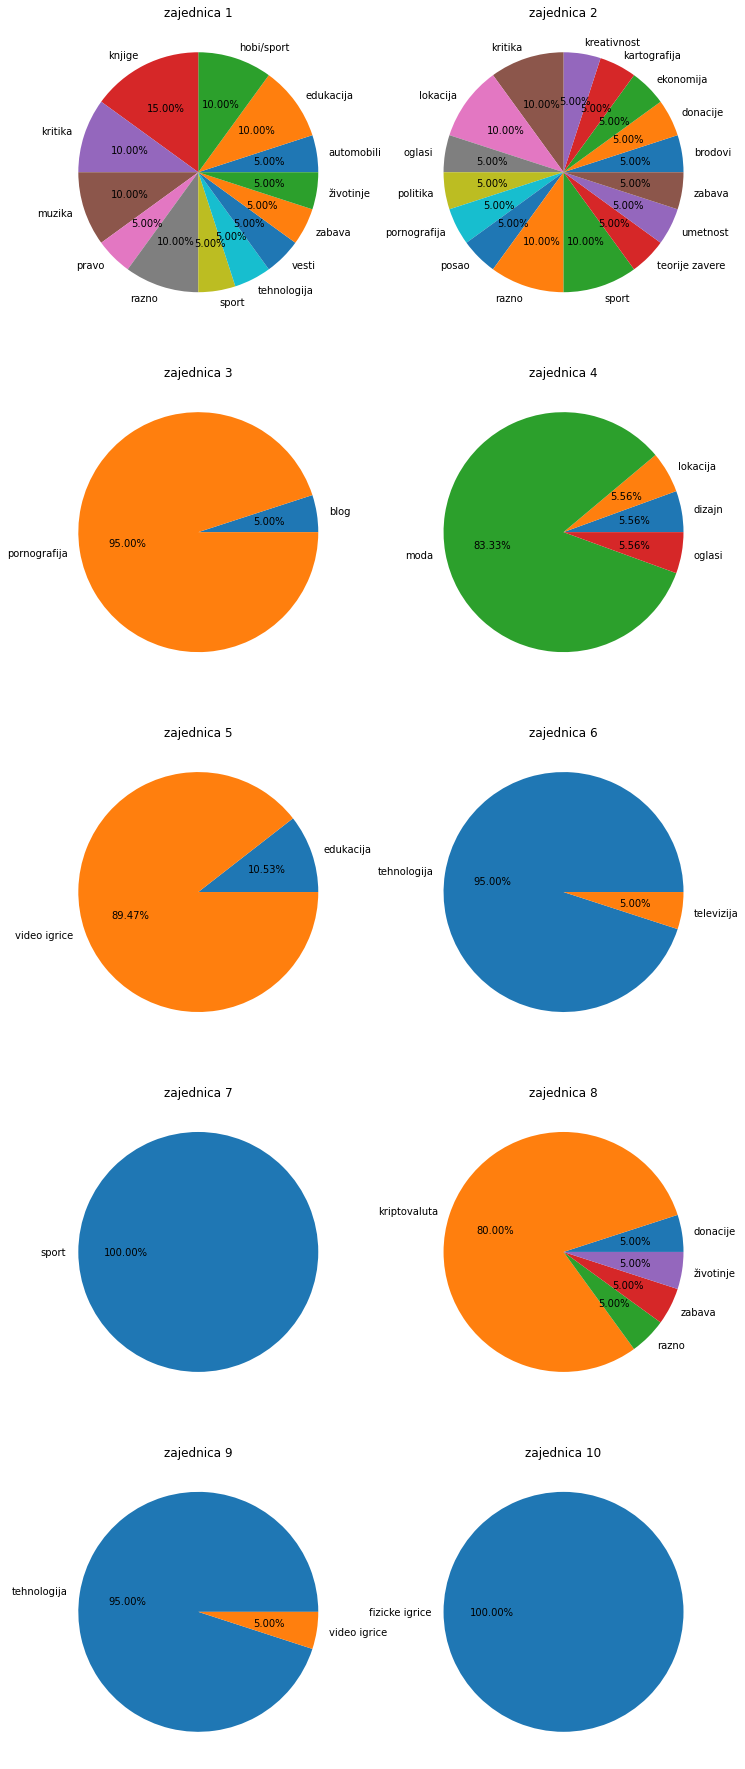

In [ ]:
fig, axs = plt.subplots(5, 2)
axs[0,0].pie(comm1GBPD, labels=comm1GBPD.index, autopct='%1.2f%%')
axs[0,0].set_title("zajednica 1")
axs[0,1].pie(comm2GBPD, labels=comm2GBPD.index, autopct='%1.2f%%')
axs[0,1].set_title("zajednica 2")
axs[1,0].pie(comm3GBPD, labels=comm3GBPD.index, autopct='%1.2f%%')
axs[1,0].set_title("zajednica 3")
axs[1,1].pie(comm4GBPD, labels=comm4GBPD.index, autopct='%1.2f%%')
axs[1,1].set_title("zajednica 4")
axs[2,0].pie(comm5GBPD, labels=comm5GBPD.index, autopct='%1.2f%%')
axs[2,0].set_title("zajednica 5")
axs[2,1].pie(comm6GBPD, labels=comm6GBPD.index, autopct='%1.2f%%')
axs[2,1].set_title("zajednica 6")
axs[3,0].pie(comm7GBPD, labels=comm7GBPD.index, autopct='%1.2f%%')
axs[3,0].set_title("zajednica 7")
axs[3,1].pie(comm8GBPD, labels=comm8GBPD.index, autopct='%1.2f%%')
axs[3,1].set_title("zajednica 8")
axs[4,0].pie(comm9GBPD, labels=comm9GBPD.index, autopct='%1.2f%%')
axs[4,0].set_title("zajednica 9")
axs[4,1].pie(comm10GBPD, labels=comm10GBPD.index, autopct='%1.2f%%')
axs[4,1].set_title("zajednica 10")
fig.set_size_inches(12,32)
plt.savefig("commhomv.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  

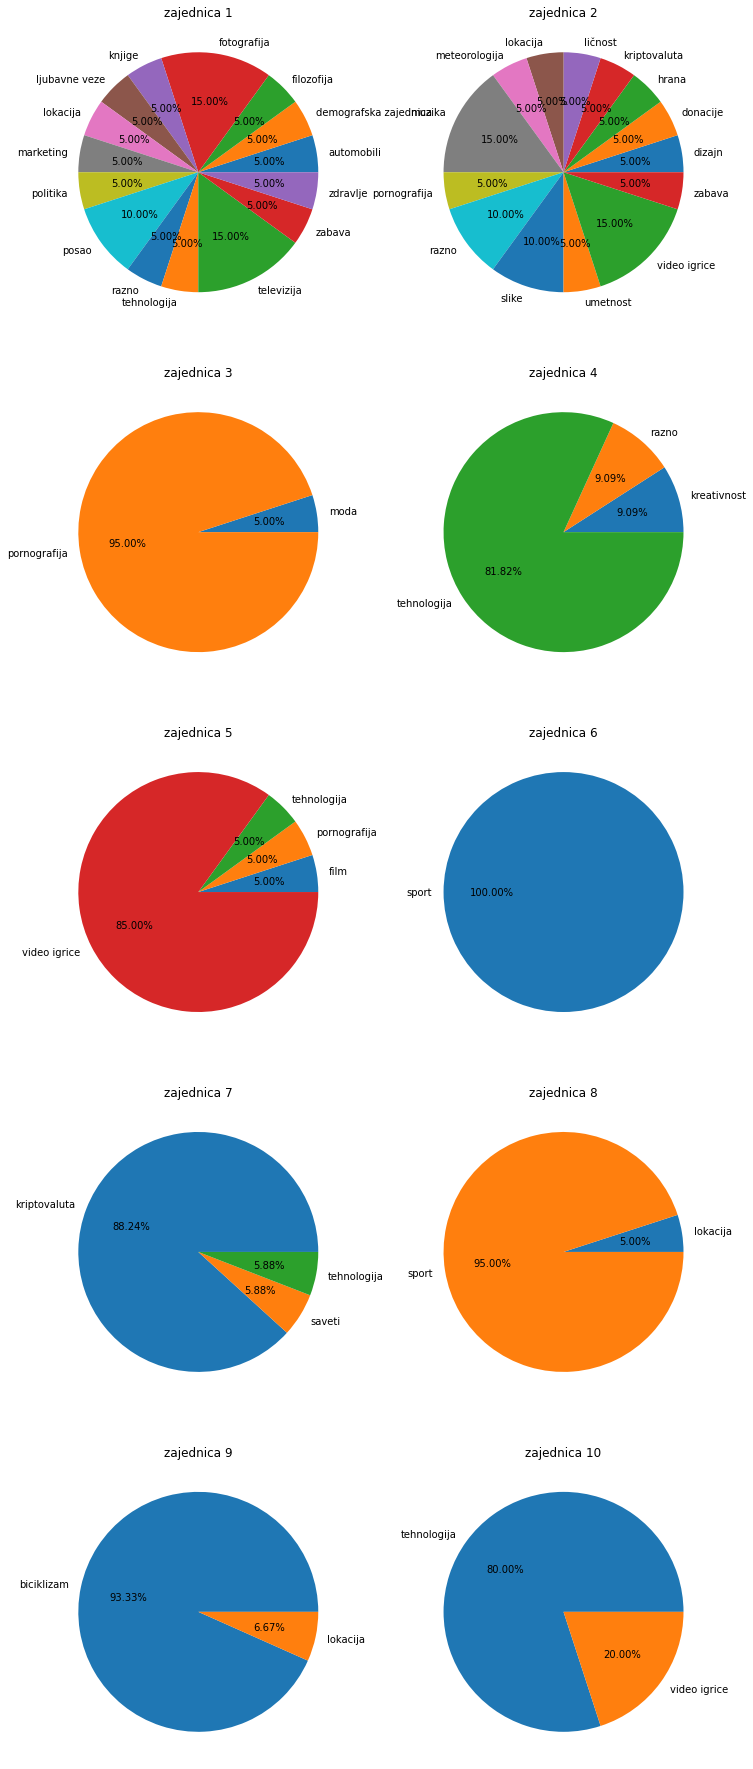

In [ ]:
fig, axs = plt.subplots(5, 2)
axs[0,0].pie(comm_pos1GBPD, labels=comm_pos1GBPD.index, autopct='%1.2f%%')
axs[0,0].set_title("zajednica 1")
axs[0,1].pie(comm_pos2GBPD, labels=comm_pos2GBPD.index, autopct='%1.2f%%')
axs[0,1].set_title("zajednica 2")
axs[1,0].pie(comm_pos3GBPD, labels=comm_pos3GBPD.index, autopct='%1.2f%%')
axs[1,0].set_title("zajednica 3")
axs[1,1].pie(comm_pos4GBPD, labels=comm_pos4GBPD.index, autopct='%1.2f%%')
axs[1,1].set_title("zajednica 4")
axs[2,0].pie(comm_pos5GBPD, labels=comm_pos5GBPD.index, autopct='%1.2f%%')
axs[2,0].set_title("zajednica 5")
axs[2,1].pie(comm_pos6GBPD, labels=comm_pos6GBPD.index, autopct='%1.2f%%')
axs[2,1].set_title("zajednica 6")
axs[3,0].pie(comm_pos7GBPD, labels=comm_pos7GBPD.index, autopct='%1.2f%%')
axs[3,0].set_title("zajednica 7")
axs[3,1].pie(comm_pos8GBPD, labels=comm_pos8GBPD.index, autopct='%1.2f%%')
axs[3,1].set_title("zajednica 8")
axs[4,0].pie(comm_pos9GBPD, labels=comm_pos9GBPD.index, autopct='%1.2f%%')
axs[4,0].set_title("zajednica 9")
axs[4,1].pie(comm_pos10GBPD, labels=comm_pos10GBPD.index, autopct='%1.2f%%')
axs[4,1].set_title("zajednica 10")
fig.set_size_inches(12,32)
plt.savefig("commhom_posv.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  

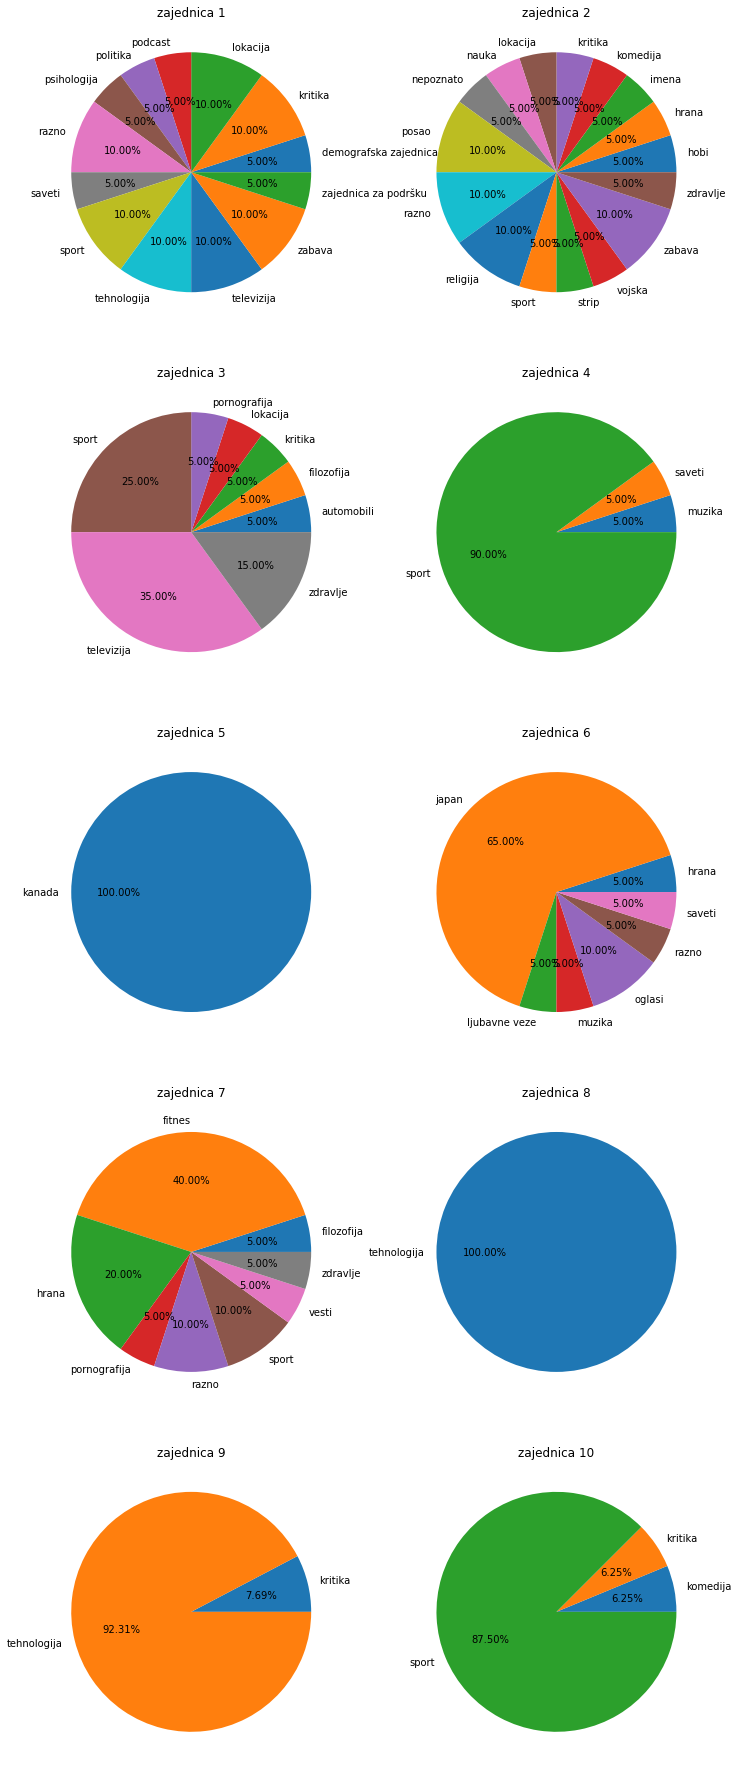

In [ ]:
fig, axs = plt.subplots(5, 2)
axs[0,0].pie(comm_neg1GBPD, labels=comm_neg1GBPD.index, autopct='%1.2f%%')
axs[0,0].set_title("zajednica 1")
axs[0,1].pie(comm_neg2GBPD, labels=comm_neg2GBPD.index, autopct='%1.2f%%')
axs[0,1].set_title("zajednica 2")
axs[1,0].pie(comm_neg3GBPD, labels=comm_neg3GBPD.index, autopct='%1.2f%%')
axs[1,0].set_title("zajednica 3")
axs[1,1].pie(comm_neg4GBPD, labels=comm_neg4GBPD.index, autopct='%1.2f%%')
axs[1,1].set_title("zajednica 4")
axs[2,0].pie(comm_neg5GBPD, labels=comm_neg5GBPD.index, autopct='%1.2f%%')
axs[2,0].set_title("zajednica 5")
axs[2,1].pie(comm_neg6GBPD, labels=comm_neg6GBPD.index, autopct='%1.2f%%')
axs[2,1].set_title("zajednica 6")
axs[3,0].pie(comm_neg7GBPD, labels=comm_neg7GBPD.index, autopct='%1.2f%%')
axs[3,0].set_title("zajednica 7")
axs[3,1].pie(comm_neg8GBPD, labels=comm_neg8GBPD.index, autopct='%1.2f%%')
axs[3,1].set_title("zajednica 8")
axs[4,0].pie(comm_neg9GBPD, labels=comm_neg9GBPD.index, autopct='%1.2f%%')
axs[4,0].set_title("zajednica 9")
axs[4,1].pie(comm_neg10GBPD, labels=comm_neg10GBPD.index, autopct='%1.2f%%')
axs[4,1].set_title("zajednica 10")
fig.set_size_inches(12,32)
plt.savefig("commhom_negv.png")